In [ ]:
import warnings
warnings.filterwarnings("ignore")

In [ ]:
!pip install sweetviz

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.1/15.1 MB 84.8 MB/s eta 0:00:00


In [ ]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sweetviz as sv
from scipy import stats
from statsmodels.tsa.seasonal import STL
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from prophet import Prophet
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.metrics import r2_score

In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("navindran/superset-dataset-with-additional-columns")

print("Path to dataset files:", path)

100%|██████████| 837k/837k [00:00<00:00, 90.1MB/s]

Extracting files...
Path to dataset files: /root/.cache/kagglehub/datasets/navindran/superset-dataset-with-additional-columns/versions/1


In [ ]:
import os

# Define the directory path
dir_path = "/root/.cache/kagglehub/datasets/navindran/superset-dataset-with-additional-columns/versions/1"

# List all files in the directory
files = os.listdir(dir_path)

# Print the file names
print(files)

['SuperstoreCleaned.csv']


In [ ]:
import pandas as pd

# Define the file path
file_path = "/root/.cache/kagglehub/datasets/navindran/superset-dataset-with-additional-columns/versions/1/SuperstoreCleaned.csv"
# Load the CSV file into a DataFrame
df = pd.read_csv(file_path)

# Display the first few rows
print(df.head())

   Row ID        Order ID        Order Date         Ship Date       Ship Mode  \
0    9406  US-2024-148985  11-11-2024 00:00  15-11-2024 00:00    Second Class   
1    9409  US-2024-110842  11-11-2024 00:00  16-11-2024 00:00  Standard Class   
2    9410  US-2024-157483  11-11-2024 00:00  18-11-2024 00:00  Standard Class   
3    9411  US-2024-110842  11-11-2024 00:00  16-11-2024 00:00  Standard Class   
4    1702  US-2021-144078  25-11-2021 00:00  29-11-2021 00:00  Standard Class   

  Customer ID    Customer Name      Segment Country_Region         City  ...  \
0    TB-21190   Thomas Brumley  Home Office  United States  Los Angeles  ...   
1    GA-14725    Guy Armstrong     Consumer  United States  Los Angeles  ...   
2    EP-13915       Emily Phan     Consumer  United States      Detroit  ...   
3    GA-14725    Guy Armstrong     Consumer  United States  Los Angeles  ...   
4    RB-19435  Richard Bierner     Consumer  United States  Los Angeles  ...   

        First Order Manufacturer

In [ ]:
df

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country_Region,City,...,First Order,Manufacturer,Order Priority,Gender,Holiday ID,Is Holiday,Delivery Date,Return ID,Is Returned,Shipment Status
0,9406,US-2024-148985,11-11-2024 00:00,15-11-2024 00:00,Second Class,TB-21190,Thomas Brumley,Home Office,United States,Los Angeles,...,27-12-2021 00:00,DAX,Medium,Male,44,National Holiday,20-11-2024 00:00,0,False,On Time
1,9409,US-2024-110842,11-11-2024 00:00,16-11-2024 00:00,Standard Class,GA-14725,Guy Armstrong,Consumer,United States,Los Angeles,...,11-02-2021 00:00,Belkin,Medium,Male,44,National Holiday,19-11-2024 00:00,0,False,Delayed
2,9410,US-2024-157483,11-11-2024 00:00,18-11-2024 00:00,Standard Class,EP-13915,Emily Phan,Consumer,United States,Detroit,...,06-07-2021 00:00,Boston,Low,Female,44,National Holiday,21-11-2024 00:00,0,False,Delayed
3,9411,US-2024-110842,11-11-2024 00:00,16-11-2024 00:00,Standard Class,GA-14725,Guy Armstrong,Consumer,United States,Los Angeles,...,11-02-2021 00:00,Ibico,Medium,Male,44,National Holiday,19-11-2024 00:00,0,False,Delayed
4,1702,US-2021-144078,25-11-2021 00:00,29-11-2021 00:00,Standard Class,RB-19435,Richard Bierner,Consumer,United States,Los Angeles,...,11-03-2021 00:00,Hon,Medium,Male,10,National Holiday,02-12-2021 00:00,0,False,Delayed
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10189,5809,US-2023-106656,23-09-2023 00:00,26-09-2023 00:00,First Class,DV-13045,Darrin Van Huff,Corporate,United States,San Diego,...,12-06-2023 00:00,Avery,High,Male,0,Weekend Holidays,27-09-2023 00:00,0,False,Delayed
10190,3328,US-2022-124800,26-09-2022 00:00,30-09-2022 00:00,Standard Class,RW-19540,Rick Wilson,Corporate,United States,Mesa,...,03-02-2022 00:00,Linden,Medium,Male,0,Business Working Day,03-10-2022 00:00,0,False,Delayed
10191,9129,CA-2024-125388,19-10-2024 00:00,23-10-2024 00:00,Standard Class,MP-17965,Michael Paige,Corporate,Canada,Montreal,...,19-10-2021 00:00,Dell,Low,Male,0,Weekend Holidays,26-10-2024 00:00,0,False,Delayed
10192,6815,US-2023-100202,31-12-2023 00:00,05-01-2024 00:00,Standard Class,BD-11620,Brian DeCherney,Consumer,United States,Anaheim,...,30-06-2021 00:00,Adtran,Medium,Male,0,Weekend Holidays,08-01-2024 00:00,0,False,Delayed


Cleaning and Reading Data¶

In [ ]:
df.shape

(10194, 33)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10194 entries, 0 to 10193
Data columns (total 33 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Row ID           10194 non-null  int64  
 1   Order ID         10194 non-null  object 
 2   Order Date       10194 non-null  object 
 3   Ship Date        10194 non-null  object 
 4   Ship Mode        10194 non-null  object 
 5   Customer ID      10194 non-null  object 
 6   Customer Name    10194 non-null  object 
 7   Segment          10194 non-null  object 
 8   Country_Region   10194 non-null  object 
 9   City             10194 non-null  object 
 10  State_Province   10194 non-null  object 
 11  Postal Code      10194 non-null  object 
 12  Region           10194 non-null  object 
 13  Product ID       10194 non-null  object 
 14  Category         10194 non-null  object 
 15  Sub-Category     10194 non-null  object 
 16  Product Name     10194 non-null  object 
 17  Sales       

In [ ]:
df.isnull().sum()

,0
Row ID,0
Order ID,0
Order Date,0
Ship Date,0
Ship Mode,0
Customer ID,0
Customer Name,0
Segment,0
Country_Region,0
City,0


In [ ]:
numeric_cols = df.select_dtypes(include=['number']).columns
df[numeric_cols].corr()

,Row ID,Sales,Quantity,Discount,Profit,Ship Days,Holiday ID,Return ID
Row ID,1.000000,-0.006990,0.000502,-0.001474,0.005386,-0.019600,0.103786,0.070423
Sales,-0.006990,1.000000,0.204144,0.039196,0.769049,-0.004946,-0.001286,-0.005121
Quantity,0.000502,0.204144,1.000000,0.007475,0.139221,0.020852,0.007234,0.004864
Discount,-0.001474,0.039196,0.007475,1.000000,0.013497,-0.001739,-0.000068,0.004186
Profit,0.005386,0.769049,0.139221,0.013497,1.000000,0.000815,0.000752,-0.009552
Ship Days,-0.019600,-0.004946,0.020852,-0.001739,0.000815,1.000000,0.020680,-0.006090
Holiday ID,0.103786,-0.001286,0.007234,-0.000068,0.000752,0.020680,1.000000,-0.007308
Return ID,0.070423,-0.005121,0.004864,0.004186,-0.009552,-0.006090,-0.007308,1.000000


In [ ]:
df = df.drop(columns=["Row ID", "Order ID", "Ship Date", "Customer Name", "Country_Region", "Postal Code", "Product Name","Discount","Return ID","Holiday ID","Ship Days","Is Holiday","Order Priority","Shipment Status","Is Returned","Delivery Date","Gender","First Order","Days To Ship"])

In [ ]:
df

,Order Date,Ship Mode,Customer ID,Segment,City,State_Province,Region,Product ID,Category,Sub-Category,Sales,Quantity,Profit,Manufacturer
0,11-11-2024 00:00,Second Class,TB-21190,Home Office,Los Angeles,California,West,FUR-FU-10001424,Furniture,Furnishings,34.92,4,11.88,DAX
1,11-11-2024 00:00,Standard Class,GA-14725,Consumer,Los Angeles,California,West,OFF-AP-10003971,Office Supplies,Appliances,8.71,1,1.21,Belkin
2,11-11-2024 00:00,Standard Class,EP-13915,Consumer,Detroit,Michigan,Central,OFF-AR-10004260,Office Supplies,Art,181.86,7,50.89,Boston
3,11-11-2024 00:00,Standard Class,GA-14725,Consumer,Los Angeles,California,West,OFF-BI-10000977,Office Supplies,Binders,152.00,5,69.90,Ibico
4,25-11-2021 00:00,Standard Class,RB-19435,Consumer,Los Angeles,California,West,FUR-CH-10002335,Furniture,Chairs,906.68,4,235.72,Hon
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10189,23-09-2023 00:00,First Class,DV-13045,Corporate,San Diego,California,West,OFF-LA-10003148,Office Supplies,Labels,15.12,3,6.51,Avery
10190,26-09-2022 00:00,Standard Class,RW-19540,Corporate,Mesa,Arizona,West,OFF-BI-10003984,Office Supplies,Binders,205.38,9,69.30,Linden
10191,19-10-2024 00:00,Standard Class,MP-17965,Corporate,Montreal,Quebec,East,OFF-ST-10000918,Office Supplies,Storage,33.93,3,8.82,Dell
10192,31-12-2023 00:00,Standard Class,BD-11620,Consumer,Anaheim,California,West,TEC-PH-10002563,Technology,Phones,377.97,3,98.28,Adtran


**Outliers**

In [ ]:
def handle_outliers(df, column, threshold=3):
    z_scores = np.abs(stats.zscore(df[[column]].dropna()))
    df = df[(z_scores < threshold).all(axis=1)]

    return df

In [ ]:
df = handle_outliers(df, "Sales")

Data to TimeSeries data

In [ ]:
df['Order Date'] = pd.to_datetime(df['Order Date'], format='%d-%m-%Y %H:%M', errors='coerce').dt.date
df

,Order Date,Ship Mode,Customer ID,Segment,City,State_Province,Region,Product ID,Category,Sub-Category,Sales,Quantity,Profit,Manufacturer
0,2024-11-11,Second Class,TB-21190,Home Office,Los Angeles,California,West,FUR-FU-10001424,Furniture,Furnishings,34.92,4,11.88,DAX
1,2024-11-11,Standard Class,GA-14725,Consumer,Los Angeles,California,West,OFF-AP-10003971,Office Supplies,Appliances,8.71,1,1.21,Belkin
2,2024-11-11,Standard Class,EP-13915,Consumer,Detroit,Michigan,Central,OFF-AR-10004260,Office Supplies,Art,181.86,7,50.89,Boston
3,2024-11-11,Standard Class,GA-14725,Consumer,Los Angeles,California,West,OFF-BI-10000977,Office Supplies,Binders,152.00,5,69.90,Ibico
4,2021-11-25,Standard Class,RB-19435,Consumer,Los Angeles,California,West,FUR-CH-10002335,Furniture,Chairs,906.68,4,235.72,Hon
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10189,2023-09-23,First Class,DV-13045,Corporate,San Diego,California,West,OFF-LA-10003148,Office Supplies,Labels,15.12,3,6.51,Avery
10190,2022-09-26,Standard Class,RW-19540,Corporate,Mesa,Arizona,West,OFF-BI-10003984,Office Supplies,Binders,205.38,9,69.30,Linden
10191,2024-10-19,Standard Class,MP-17965,Corporate,Montreal,Quebec,East,OFF-ST-10000918,Office Supplies,Storage,33.93,3,8.82,Dell
10192,2023-12-31,Standard Class,BD-11620,Consumer,Anaheim,California,West,TEC-PH-10002563,Technology,Phones,377.97,3,98.28,Adtran


In [ ]:
def prepare_for_timeseries(dataframe):
    dataframe['Order Date'] = pd.to_datetime(dataframe['Order Date'], format='%Y/%m/%d', errors='coerce')

    dataframe = dataframe.sort_values(by='Order Date')

    dataframe.reset_index(drop=True, inplace=True)

    print("##### Data Preparation Completed")
    print("\n##### Sorted DataFrame Head")
    print(dataframe.head())

    return dataframe

df = prepare_for_timeseries(df)

##### Data Preparation Completed

##### Sorted DataFrame Head
  Order Date       Ship Mode Customer ID      Segment          City  \
0 2021-01-03  Standard Class    DP-13000     Consumer       Houston   
1 2021-01-04  Standard Class    PO-19195  Home Office    Naperville   
2 2021-01-04  Standard Class    PO-19195  Home Office    Naperville   
3 2021-01-04  Standard Class    PO-19195  Home Office    Naperville   
4 2021-01-05  Standard Class    MB-18085     Consumer  Philadelphia   

  State_Province   Region       Product ID         Category Sub-Category  \
0          Texas  Central  OFF-PA-10000174  Office Supplies        Paper   
1       Illinois  Central  OFF-LA-10003223  Office Supplies       Labels   
2       Illinois  Central  OFF-ST-10002743  Office Supplies      Storage   
3       Illinois  Central  OFF-BI-10004094  Office Supplies      Binders   
4   Pennsylvania     East  OFF-AR-10003478  Office Supplies          Art   

    Sales  Quantity  Profit Manufacturer  
0   16.46  

In [ ]:
df['month'] = pd.to_datetime(df['Order Date']).dt.to_period('M')
df.head()
mdf = df.groupby('month')['Sales'].sum()
mdf = pd.DataFrame(mdf)
mdf['time'] = np.arange(len(mdf.index))
mdf.head()

,Sales,time
month,,
2021-01,11823.07,0
2021-02,4714.04,1
2021-03,33885.79,2
2021-04,25234.52,3
2021-05,25910.80,4


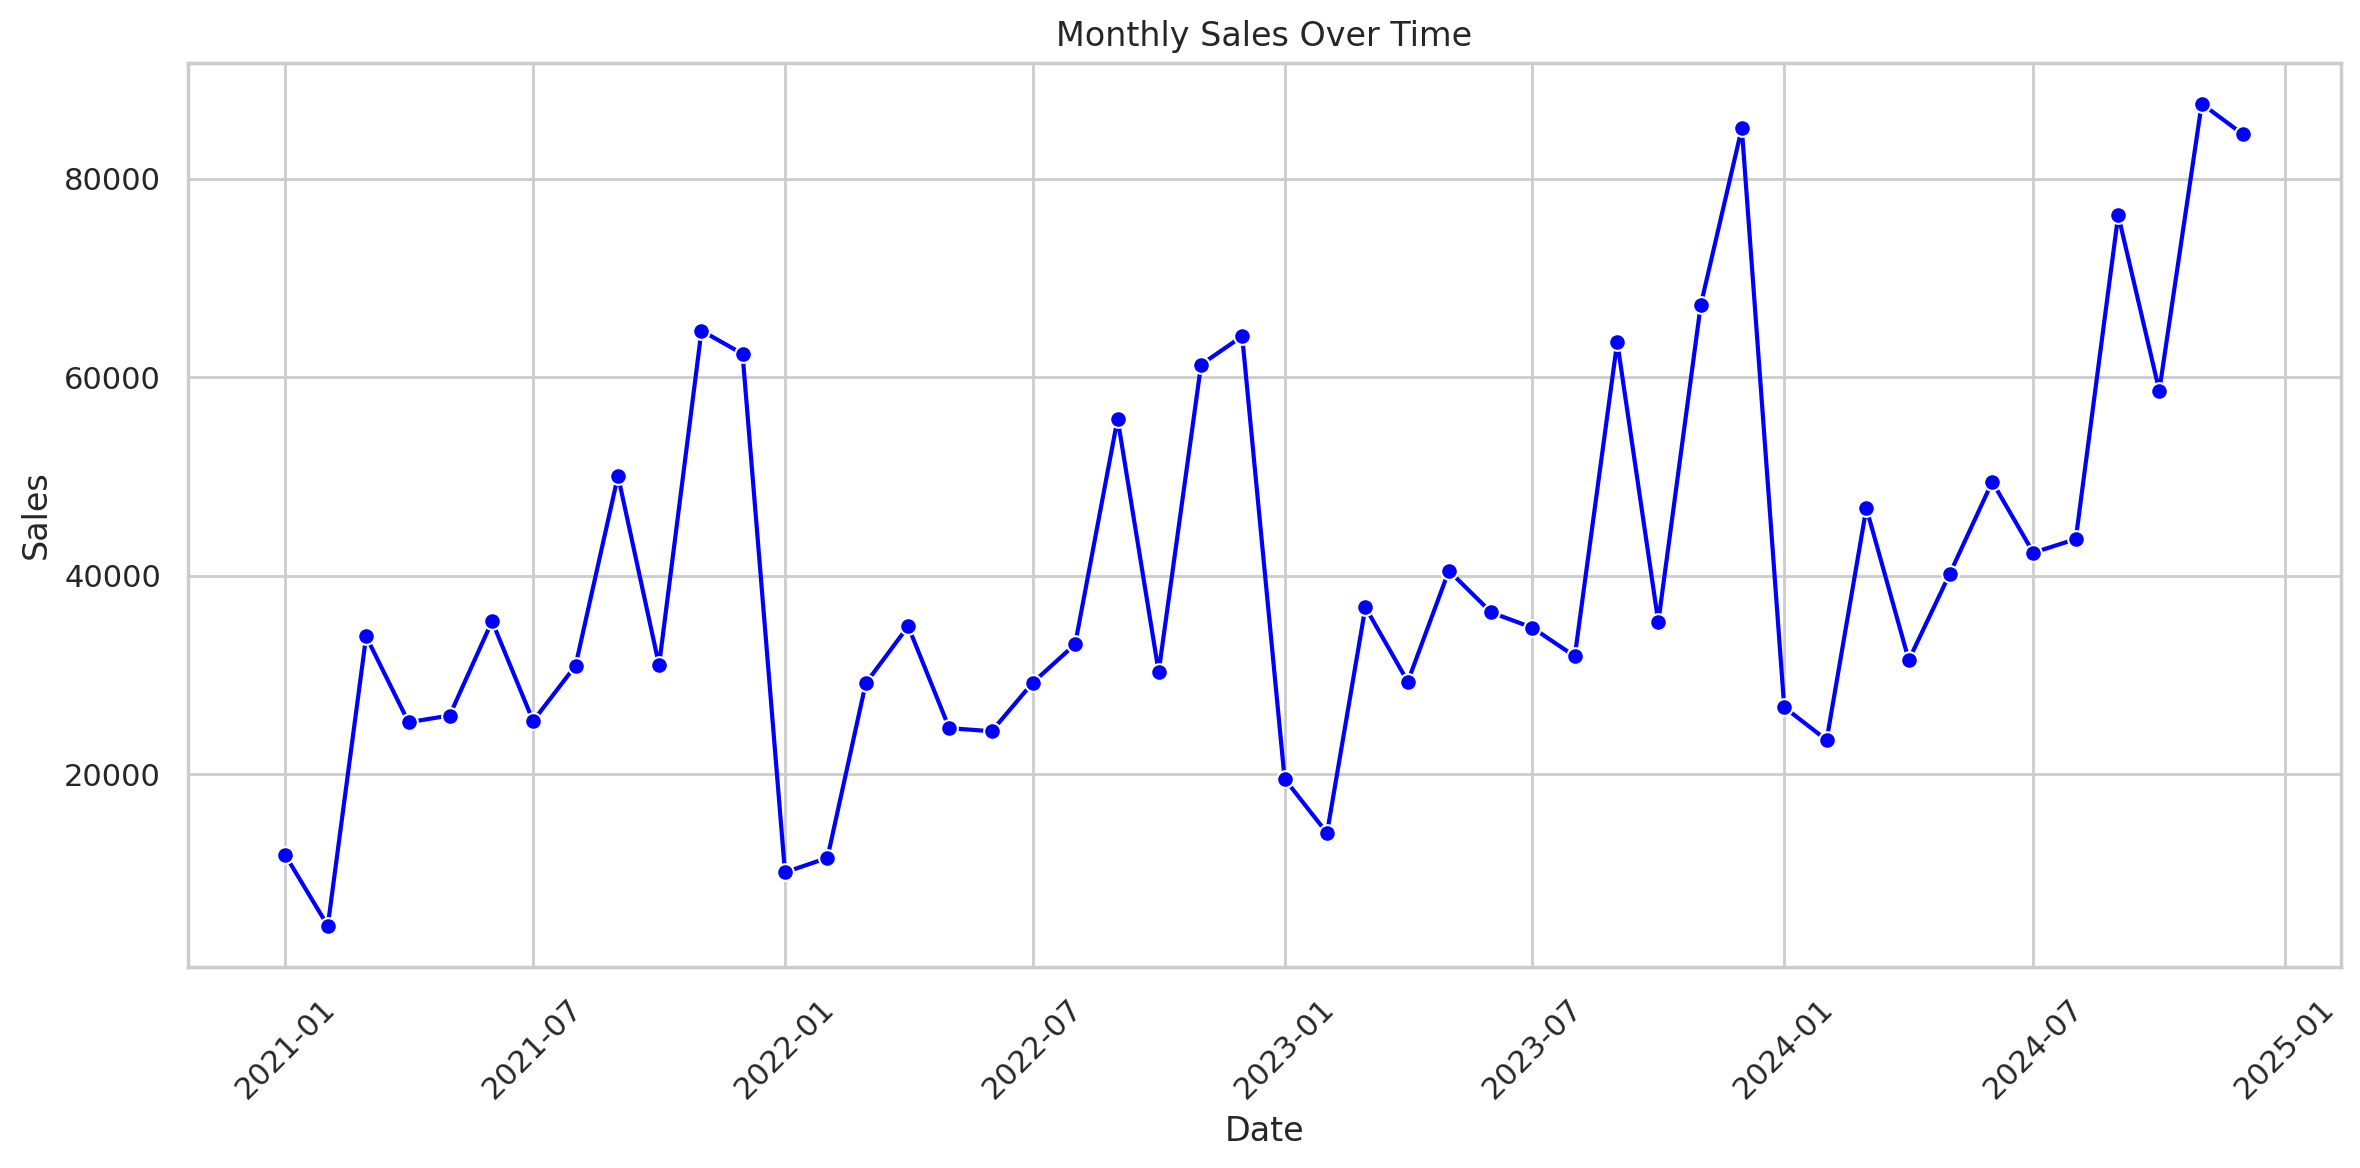

In [ ]:
sns.set(style='whitegrid')
plt.figure(figsize=(12, 6), dpi=200)

if isinstance(mdf.index, pd.PeriodIndex):
    mdf.index = mdf.index.to_timestamp()

sns.lineplot(data=mdf, x=mdf.index, y='Sales', marker='o', color='blue')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.title('Monthly Sales Over Time')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

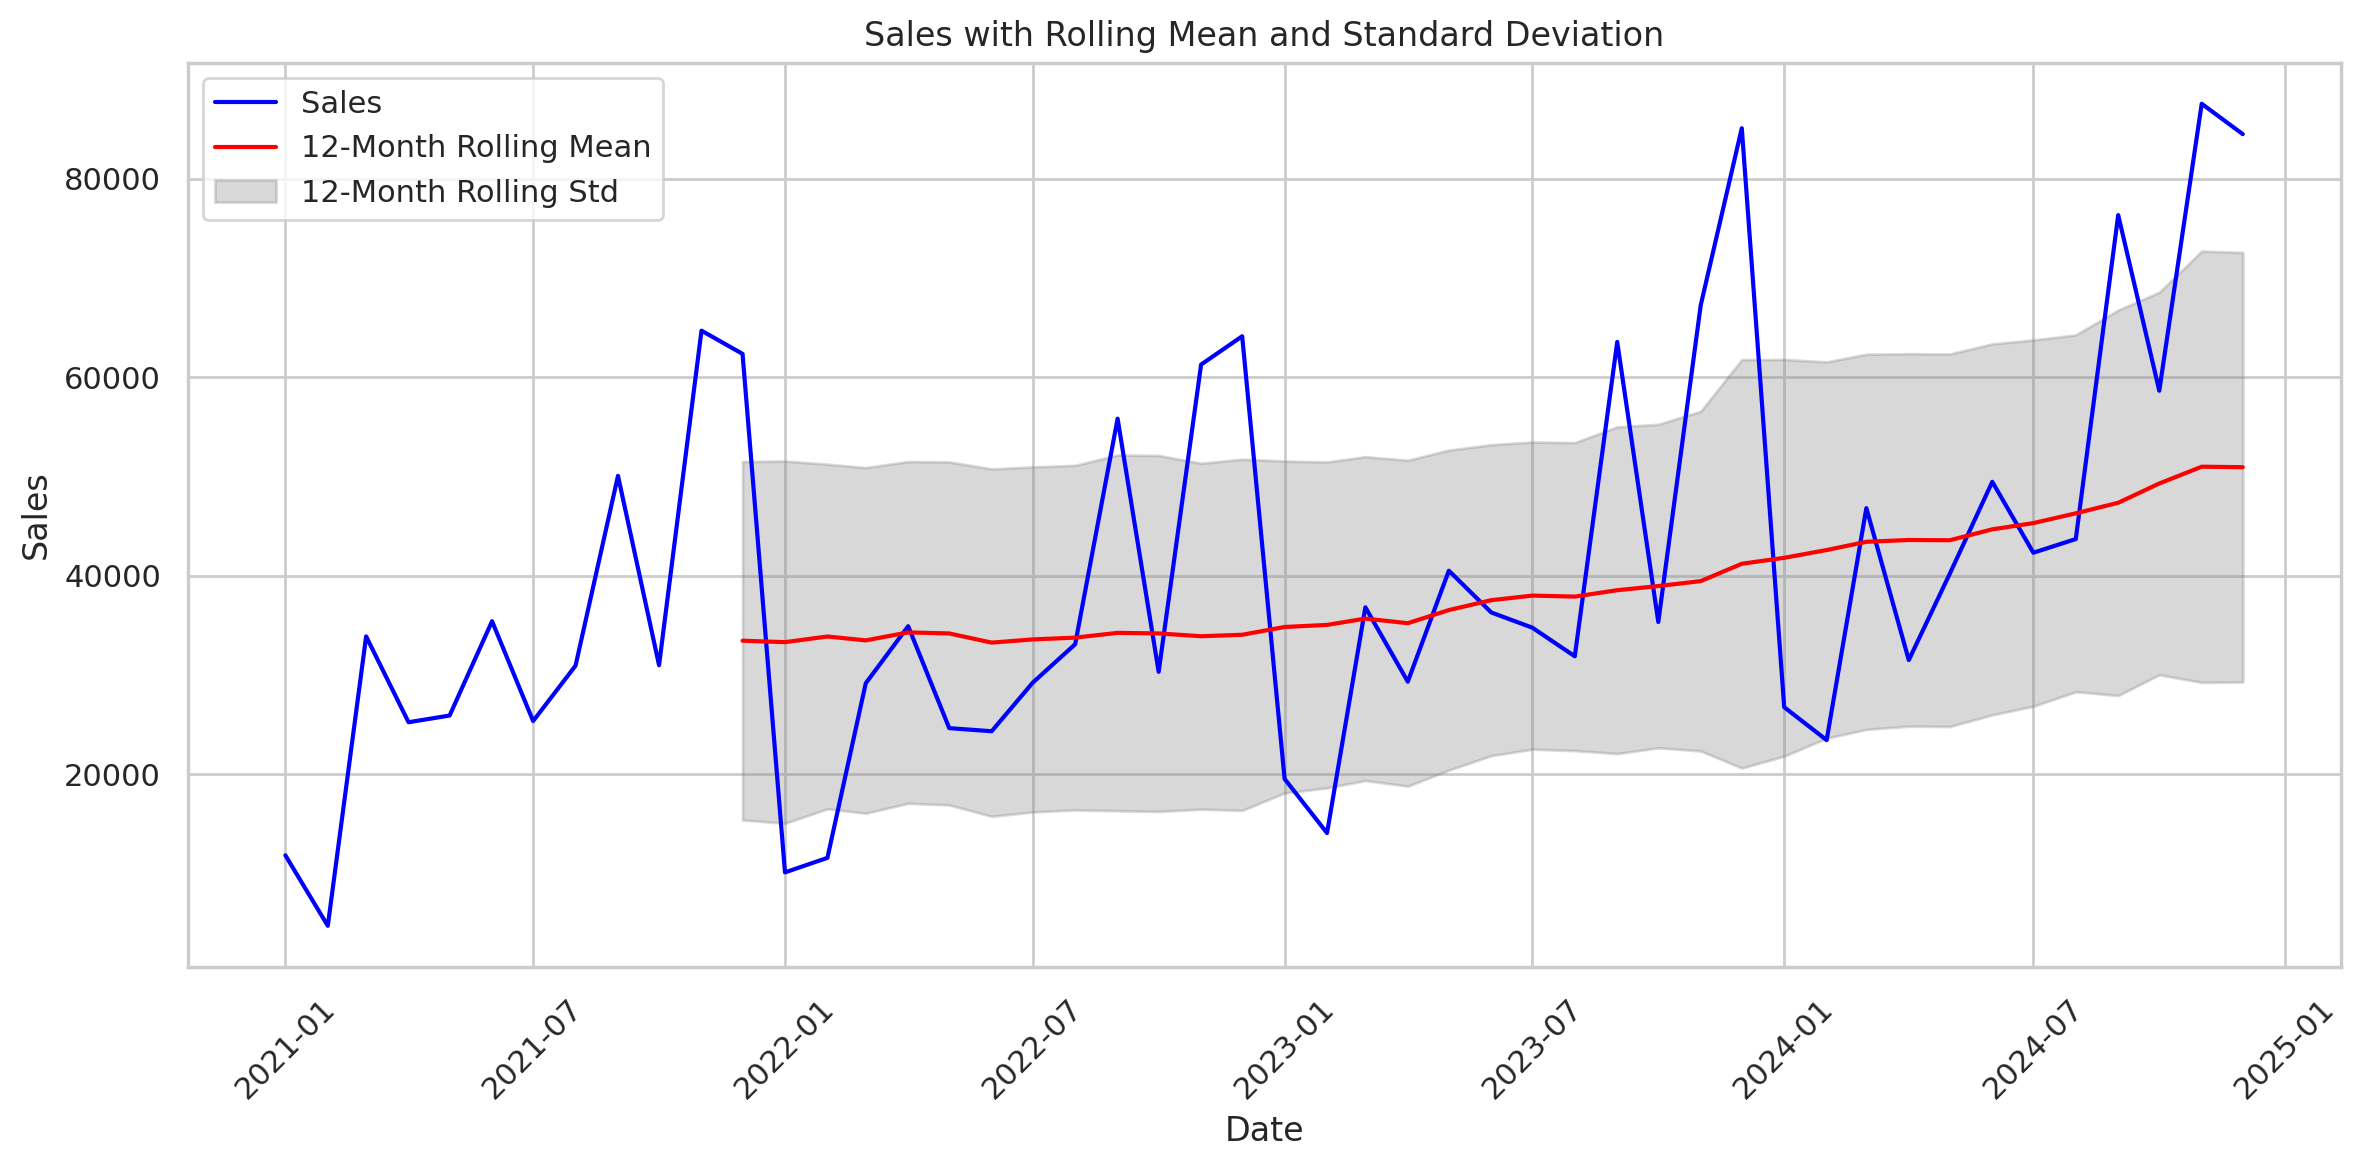

In [ ]:
# Set the rolling window size (12 months)
window_size = 12

# Calculate the rolling mean and standard deviation
mdf['Rolling_Mean'] = mdf['Sales'].rolling(window=window_size).mean()
mdf['Rolling_Std'] = mdf['Sales'].rolling(window=window_size).std()

# Plot the original sales data
plt.figure(figsize=(12, 6), dpi=200)
sns.lineplot(data=mdf, x=mdf.index, y='Sales', label='Sales', color='blue')

# Plot the rolling mean
sns.lineplot(data=mdf, x=mdf.index, y='Rolling_Mean', label=f'{window_size}-Month Rolling Mean', color='red')

# Plot the rolling standard deviation (as a shaded area to indicate volatility)
plt.fill_between(mdf.index, mdf['Rolling_Mean'] - mdf['Rolling_Std'], mdf['Rolling_Mean'] + mdf['Rolling_Std'],
                 color='gray', alpha=0.3, label=f'{window_size}-Month Rolling Std')

plt.xlabel('Date')
plt.ylabel('Sales')
plt.title('Sales with Rolling Mean and Standard Deviation')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

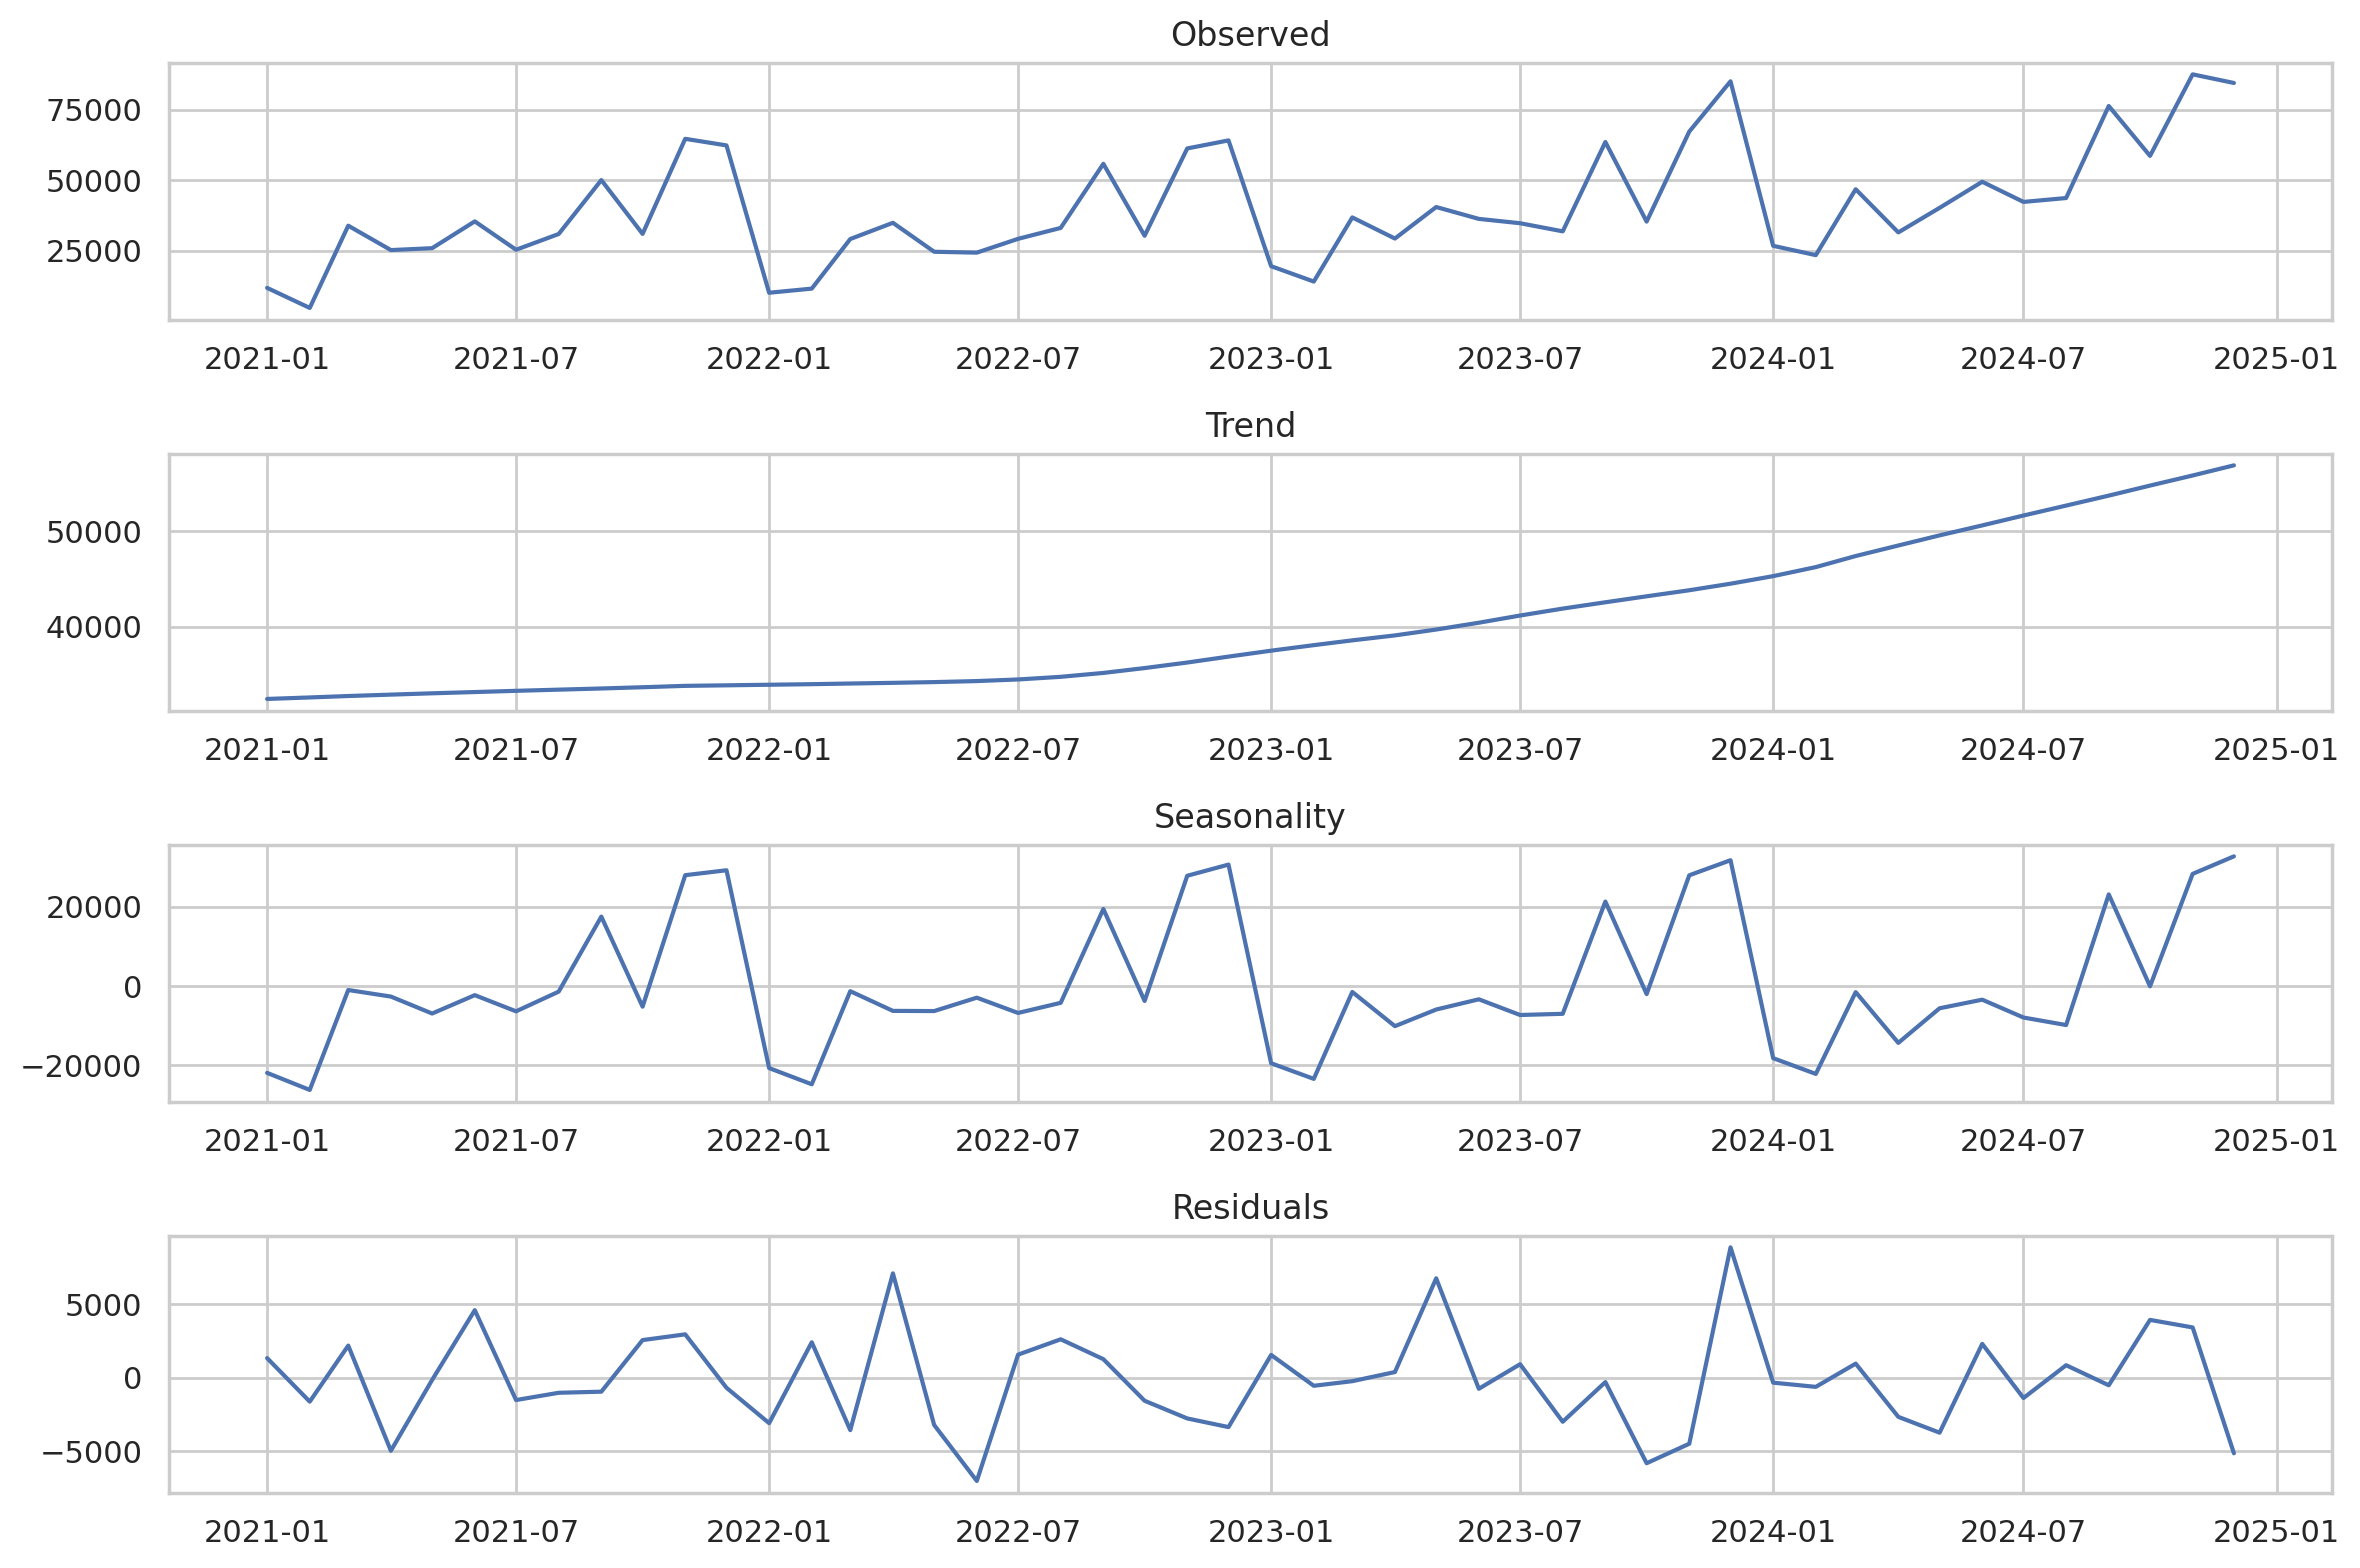

In [ ]:
# Apply STL decomposition
stl = STL(mdf['Sales'], seasonal=13)
result = stl.fit()

# Plot the decomposition
plt.figure(figsize=(12, 8), dpi=200)

plt.subplot(4, 1, 1)
plt.plot(mdf.index, result.observed)
plt.title('Observed')

plt.subplot(4, 1, 2)
plt.plot(mdf.index, result.trend)
plt.title('Trend')

plt.subplot(4, 1, 3)
plt.plot(mdf.index, result.seasonal)
plt.title('Seasonality')

plt.subplot(4, 1, 4)
plt.plot(mdf.index, result.resid)
plt.title('Residuals')

plt.tight_layout()
plt.show()

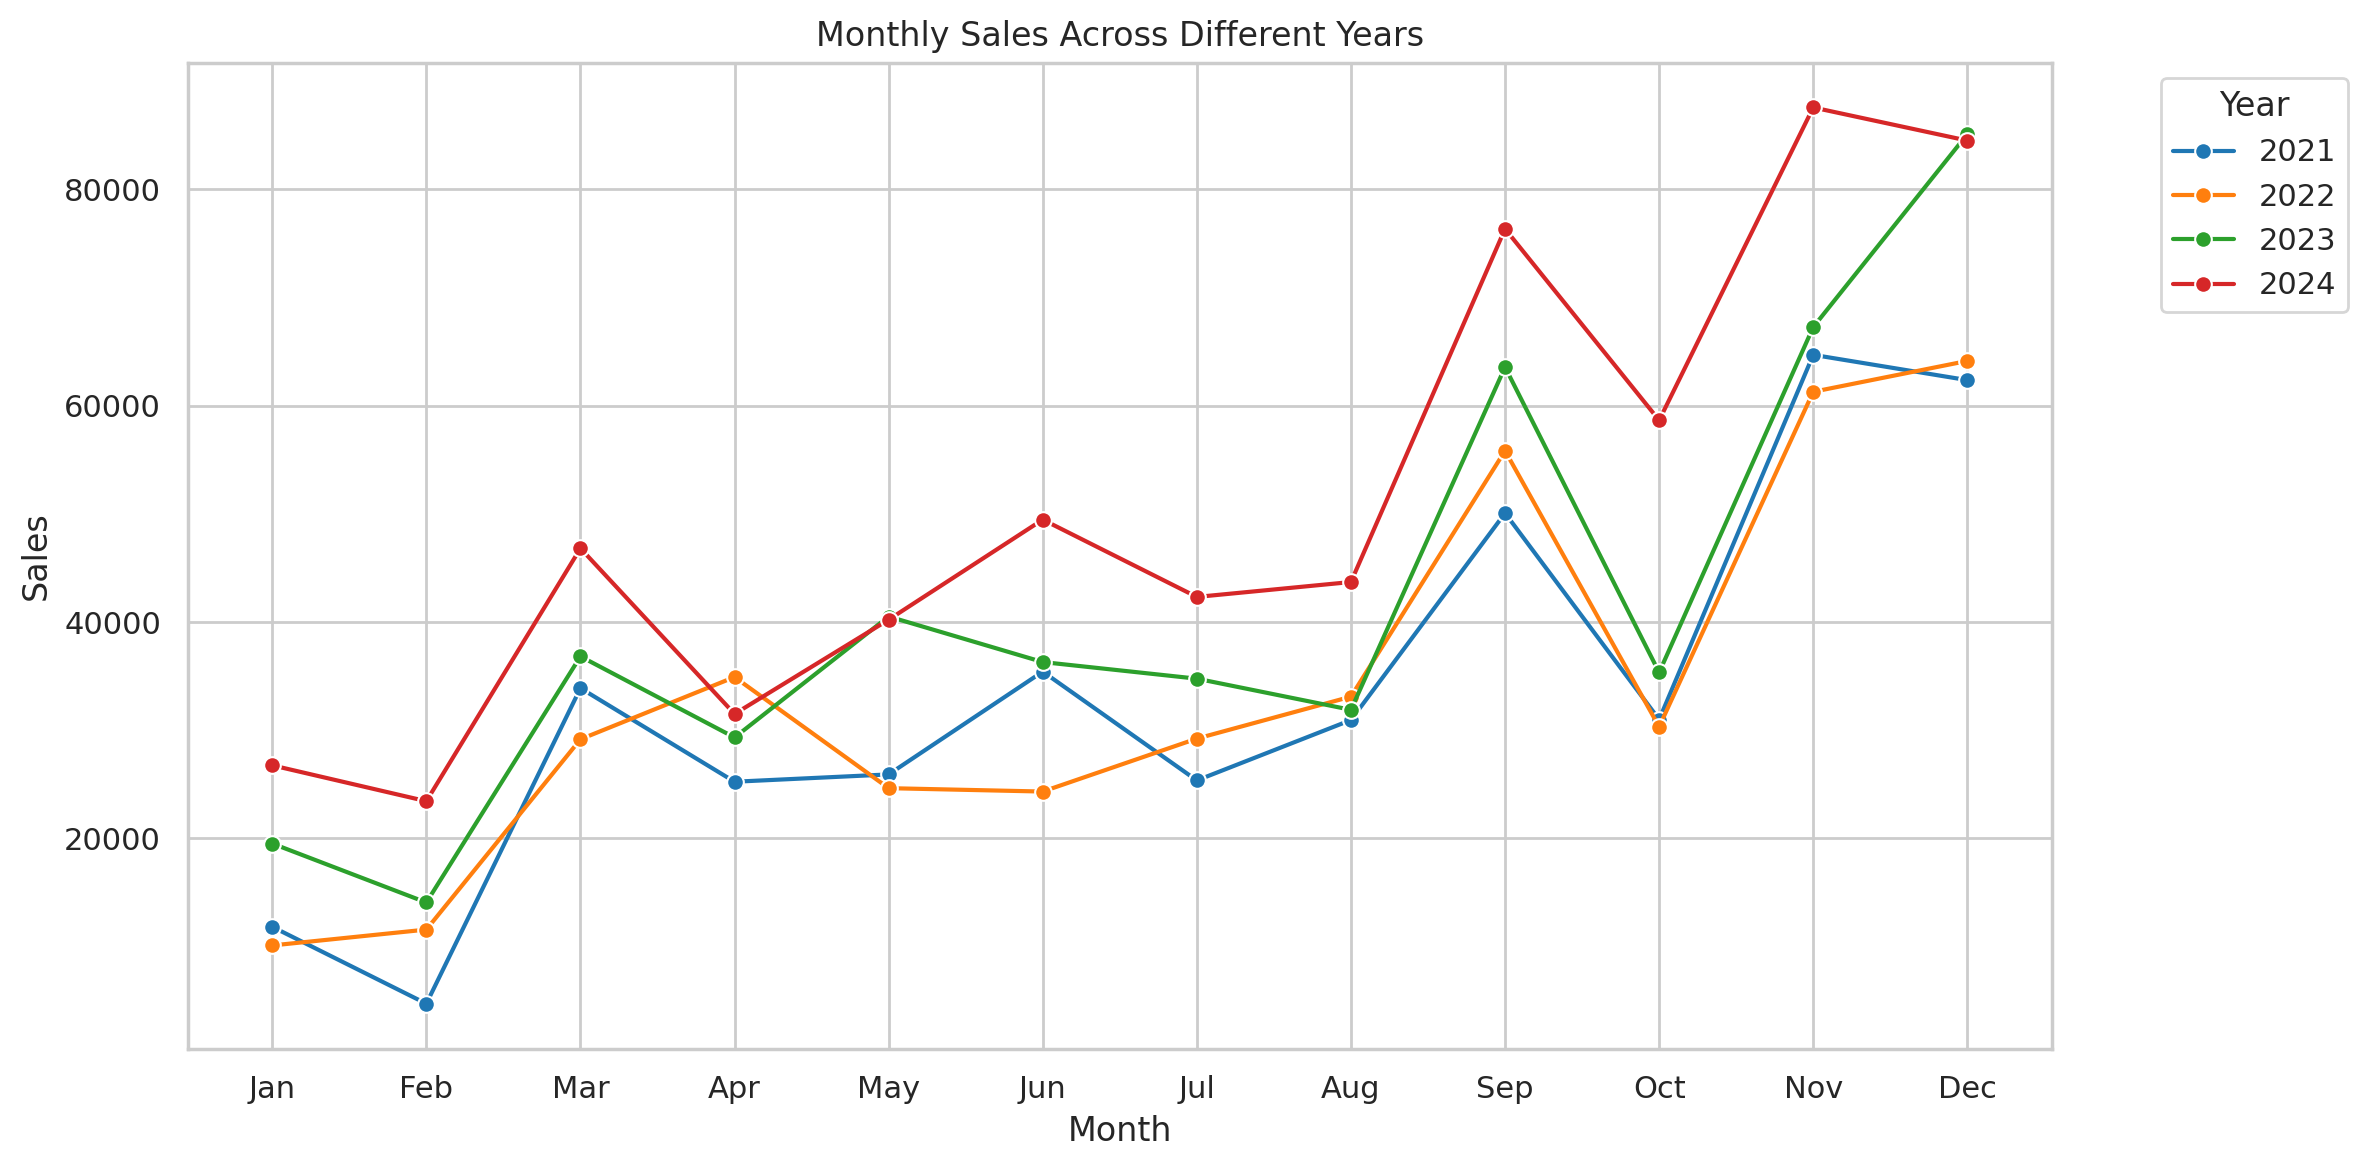

In [ ]:
# Extract the month and year from the index
mdf['Month'] = mdf.index.month
mdf['Year'] = mdf.index.year

# Create a seasonal plot: Sales vs Month, colored by Year
plt.figure(figsize=(12, 6), dpi=200)
sns.lineplot(data=mdf, x='Month', y='Sales', hue='Year', marker='o', palette='tab10')

# Customize plot
plt.xlabel('Month')
plt.ylabel('Sales')
plt.title('Monthly Sales Across Different Years')
plt.xticks(ticks=range(1, 13), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun',
                                        'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.legend(title='Year', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

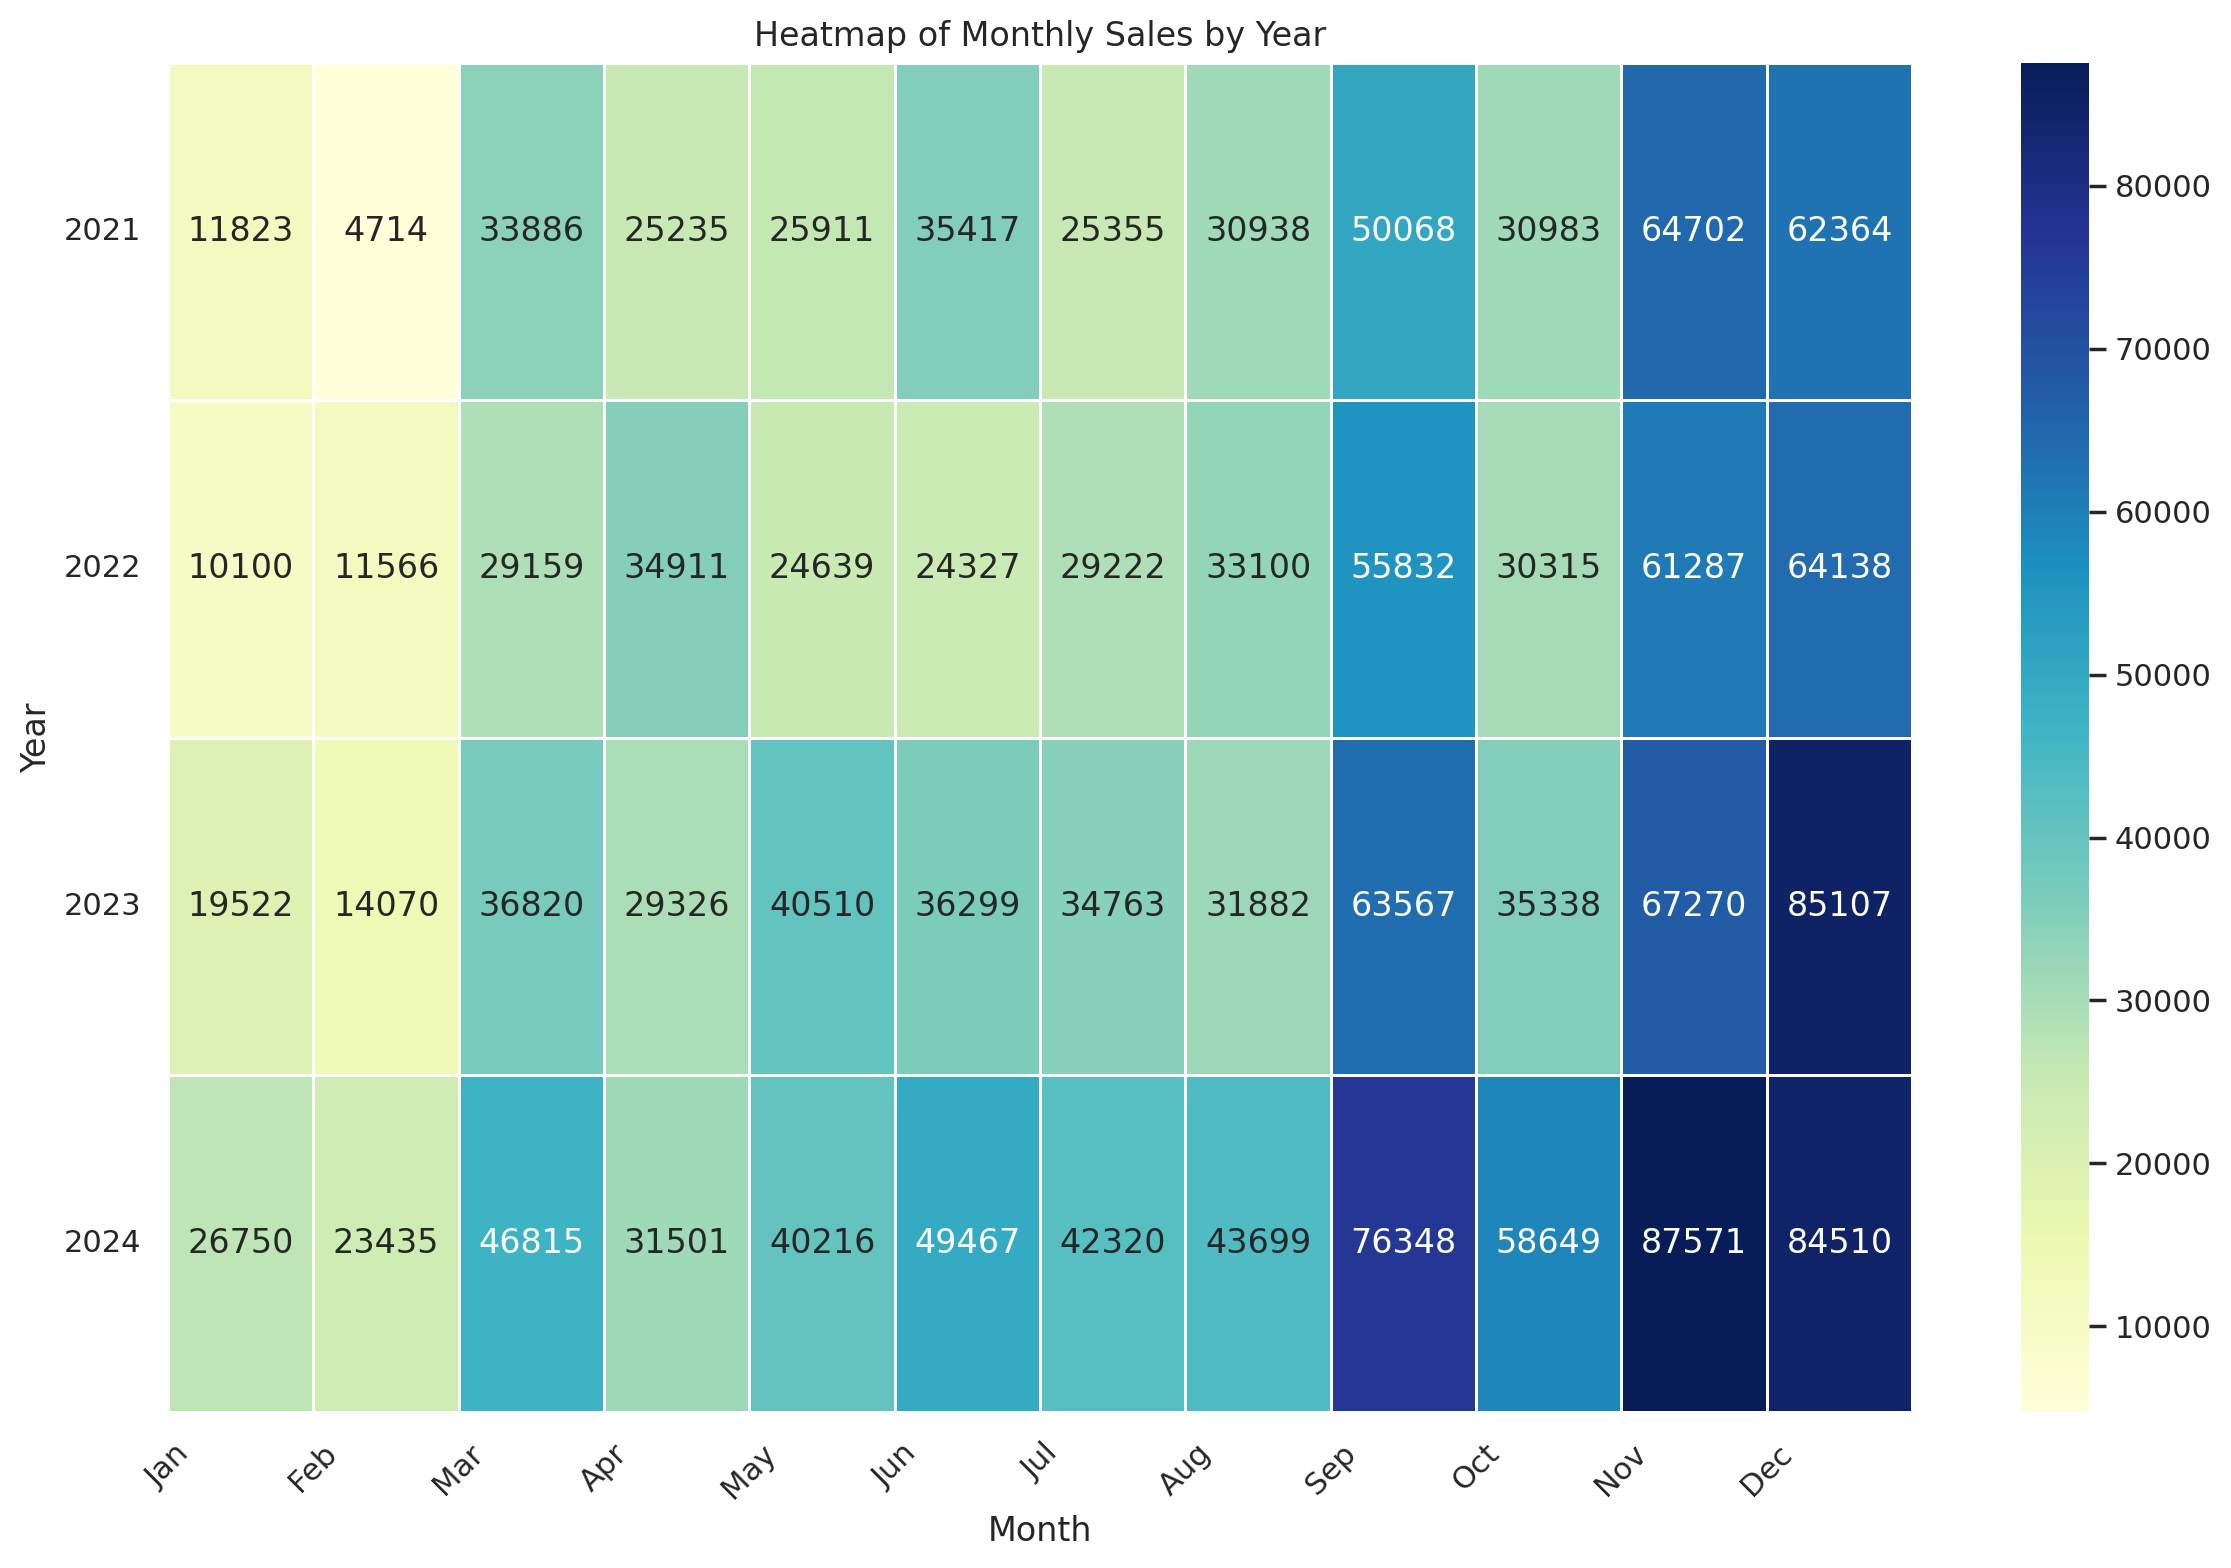

In [ ]:
# Pivot the data to create a matrix of Sales by Year and Month
heatmap_data = mdf.pivot_table(index=mdf.index.year, columns=mdf.index.month, values='Sales', aggfunc='sum')

# Create a heatmap
plt.figure(figsize=(12, 8), dpi=200)
sns.heatmap(heatmap_data, cmap='YlGnBu', annot=True, fmt='.0f', linewidths=.5)

# Customize plot
plt.xlabel('Month')
plt.ylabel('Year')
plt.title('Heatmap of Monthly Sales by Year')
plt.xticks(ticks=range(12), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun',
                                    'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'], rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


**Stationarity Check (Dickey-Fuller Test)**

In [ ]:
print("Statistical Tests: Dickey-Fuller Test")

# Perform the Dickey-Fuller test
adf_result = adfuller(mdf['Sales'])

# Extract and display the test statistic and p-value
print(f'ADF Statistic: {adf_result[0]}')
print(f'p-value: {adf_result[1]}')

# Conclusion based on p-value
if adf_result[1] <= 0.05:
    print("Reject the null hypothesis - The time series is stationary.")
else:
    print("Fail to reject the null hypothesis - The time series is non-stationary.")

Statistical Tests: Dickey-Fuller Test
ADF Statistic: -4.060305280517089
p-value: 0.001125654550960607
Reject the null hypothesis - The time series is stationary.


**Plotting ACF and PACF**

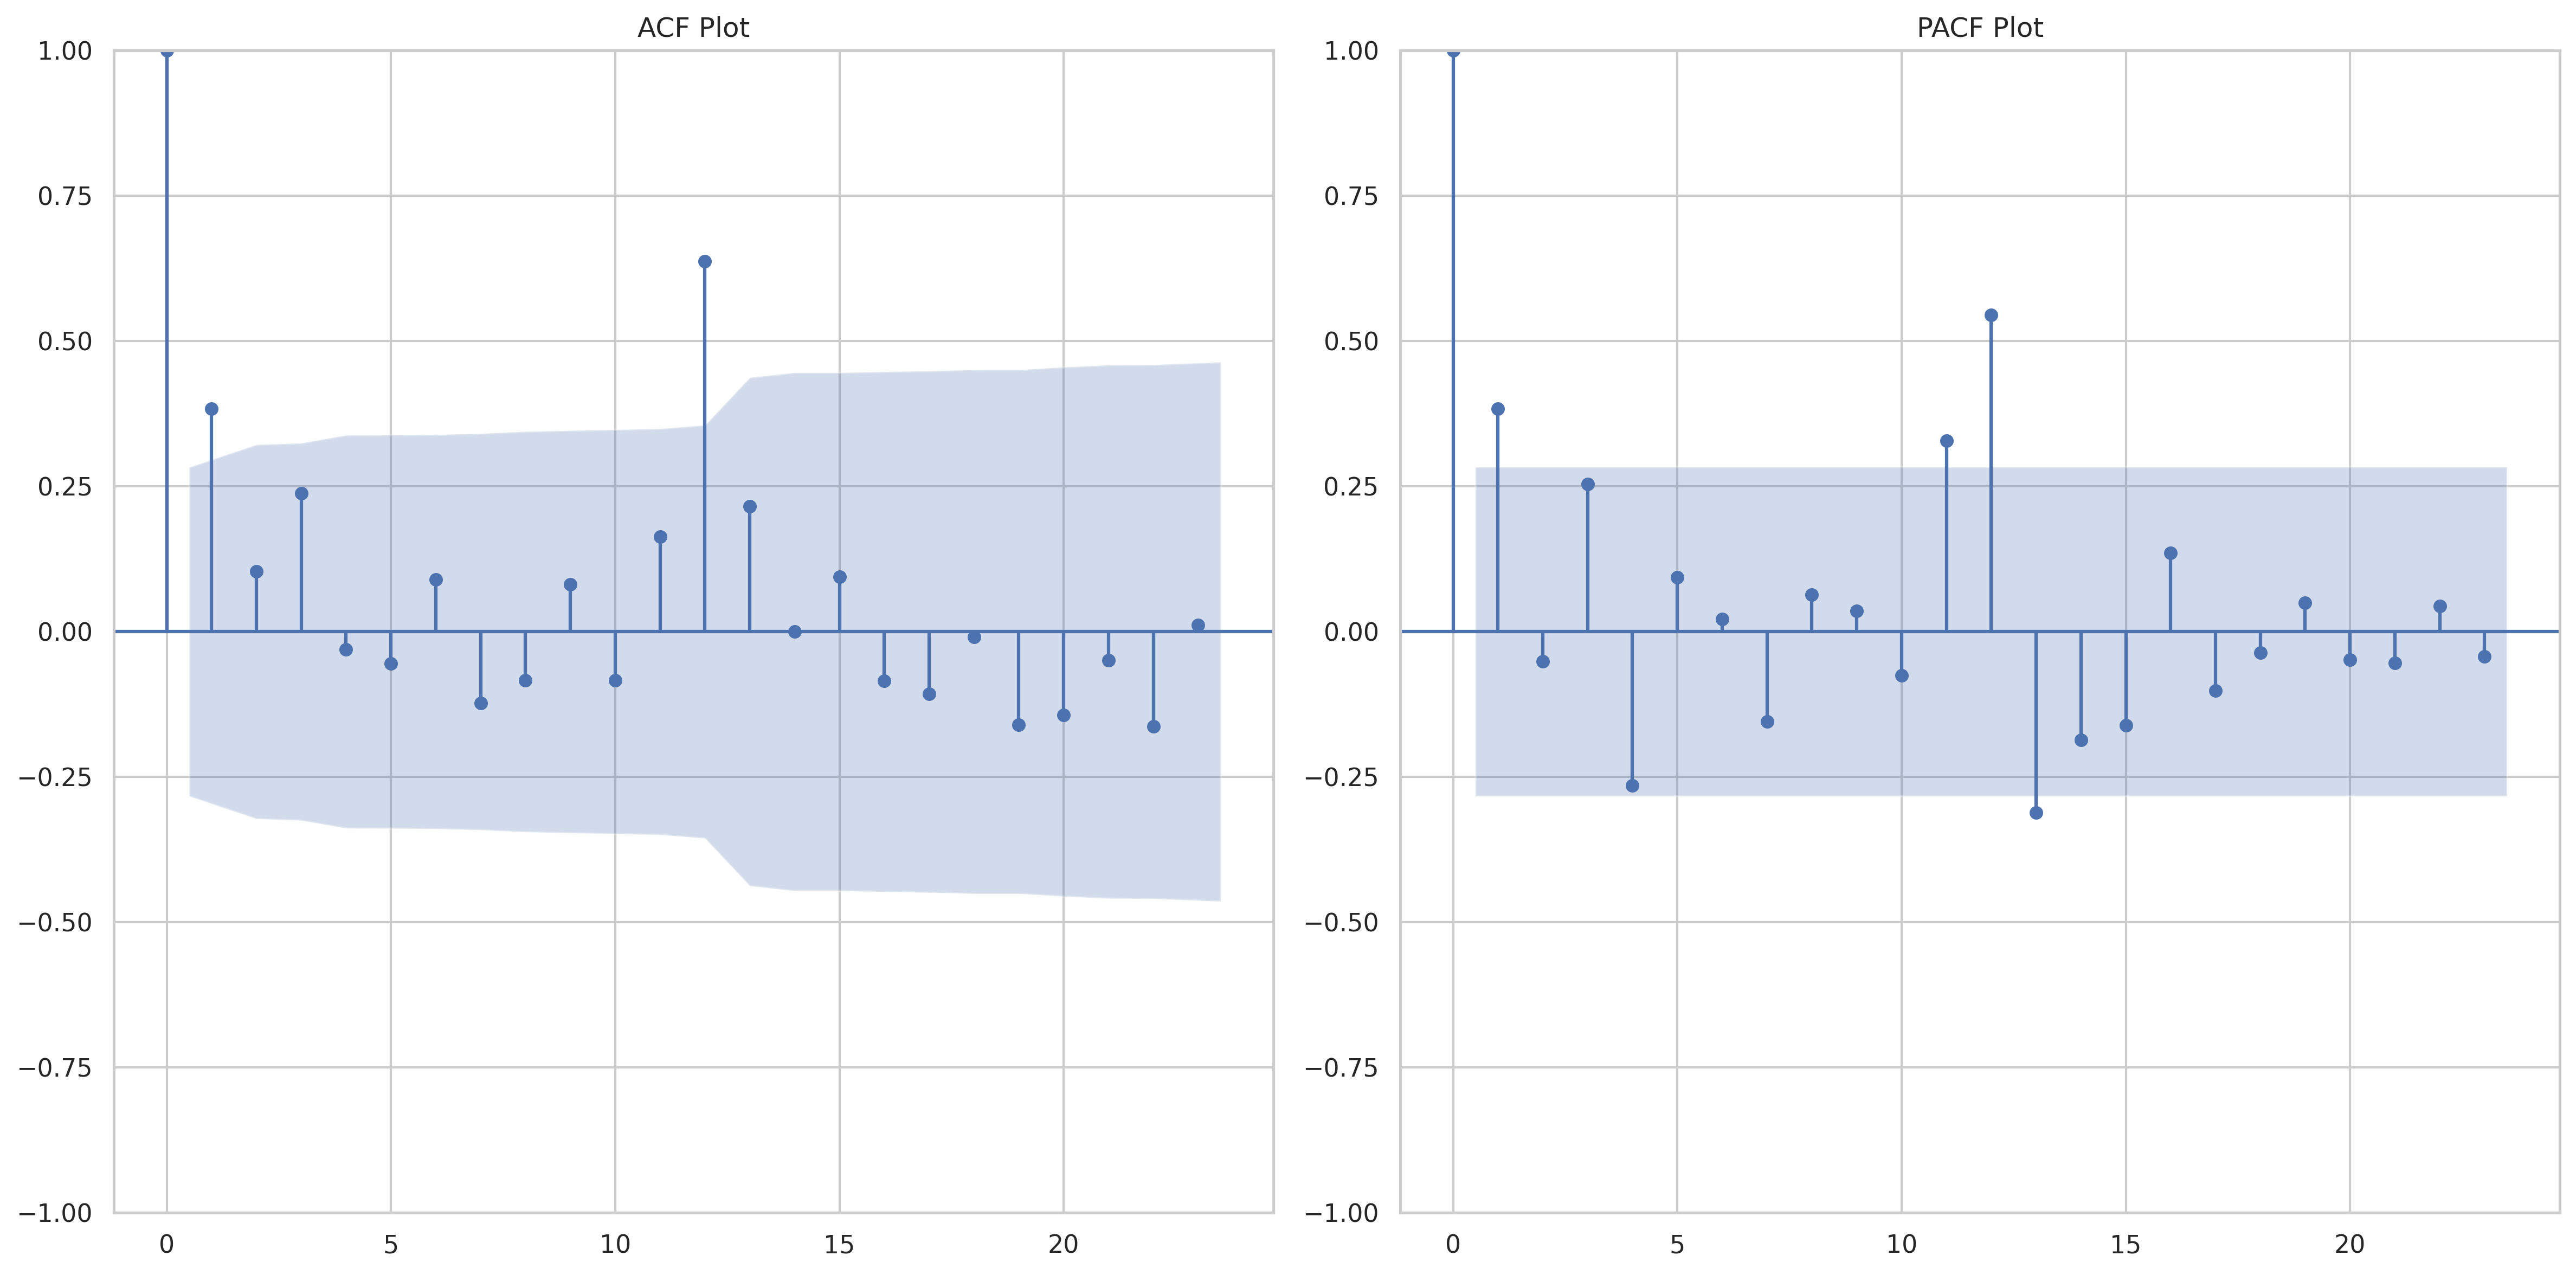

In [ ]:
# Determine the maximum number of lags
max_lags = len(mdf) // 2 - 1

# Set the size and resolution of the plot
plt.figure(figsize=(16, 8), dpi=300)

# Plot ACF
plt.subplot(1, 2, 1)
plot_acf(mdf['Sales'], ax=plt.gca(), lags=max_lags)
plt.title('ACF Plot')

# Plot PACF
plt.subplot(1, 2, 2)
plot_pacf(mdf['Sales'], ax=plt.gca(), lags=max_lags)
plt.title('PACF Plot')

# Adjust layout and show the plots
plt.tight_layout()
plt.show()

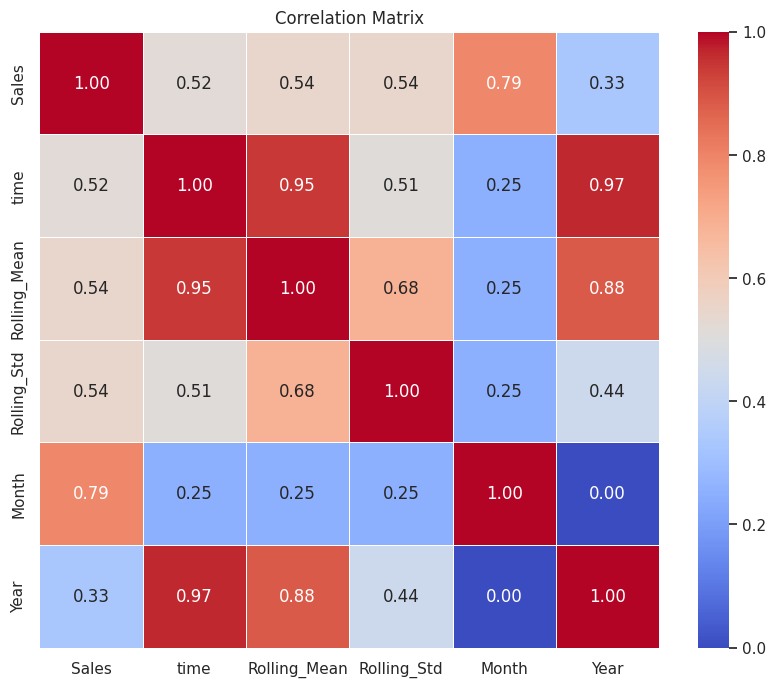

In [ ]:
# feature impacts
correlation_matrix = mdf.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

**Models**

In [ ]:
mdf.shape

(48, 6)

In [ ]:
mdf.head()

,Sales,time,Rolling_Mean,Rolling_Std,Month,Year
month,,,,,,
2021-01-01,11823.07,0,NaN,NaN,1,2021
2021-02-01,4714.04,1,NaN,NaN,2,2021
2021-03-01,33885.79,2,NaN,NaN,3,2021
2021-04-01,25234.52,3,NaN,NaN,4,2021
2021-05-01,25910.80,4,NaN,NaN,5,2021


In [ ]:
mdf.tail()

,Sales,time,Rolling_Mean,Rolling_Std,Month,Year
month,,,,,,
2024-08-01,43698.94,43,46290.456667,17984.905392,8,2024
2024-09-01,76348.32,44,47355.552500,19422.110681,9,2024
2024-10-01,58648.99,45,49298.169167,19276.050638,10,2024
2024-11-01,87571.41,46,50989.912500,21731.251296,11,2024
2024-12-01,84509.66,47,50940.119167,21646.490142,12,2024


In [ ]:
forecast_steps = 12

In [ ]:
train_mdf = mdf.iloc[:48 - forecast_steps]
test_mdf = mdf.iloc[48 - forecast_steps:forecast_steps + 48]

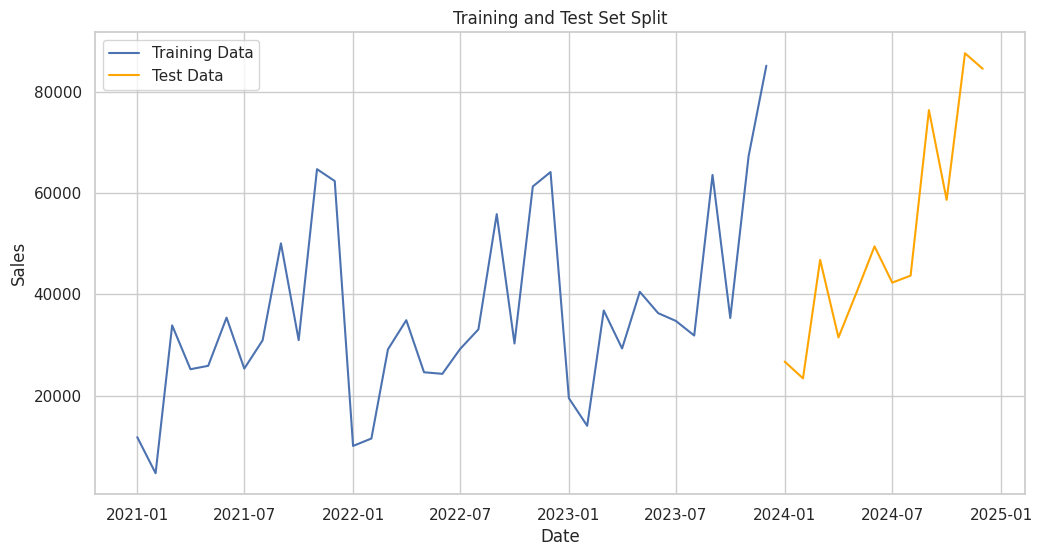

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(train_mdf.index, train_mdf['Sales'], label='Training Data')
plt.plot(test_mdf.index, test_mdf['Sales'], label='Test Data', color='orange')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.title('Training and Test Set Split')
plt.legend()
plt.show()


**1. ARIMA**

In [ ]:
p, d, q = forecast_steps, 0, forecast_steps
arma_model = ARIMA(train_mdf['Sales'], order=(p, d, q))
arma_results = arma_model.fit()

/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [ ]:
forecast = arma_results.get_forecast(steps=forecast_steps)
forecast_mean = forecast.predicted_mean
confidence_intervals = forecast.conf_int()
forecast_index = pd.date_range(start=train_mdf.index[-1] + pd.DateOffset(1), periods=forecast_steps, freq='M')
forecast_mean.index = pd.to_datetime(forecast_mean.index)
forecast_df = forecast_mean.to_frame(name='Forecast')

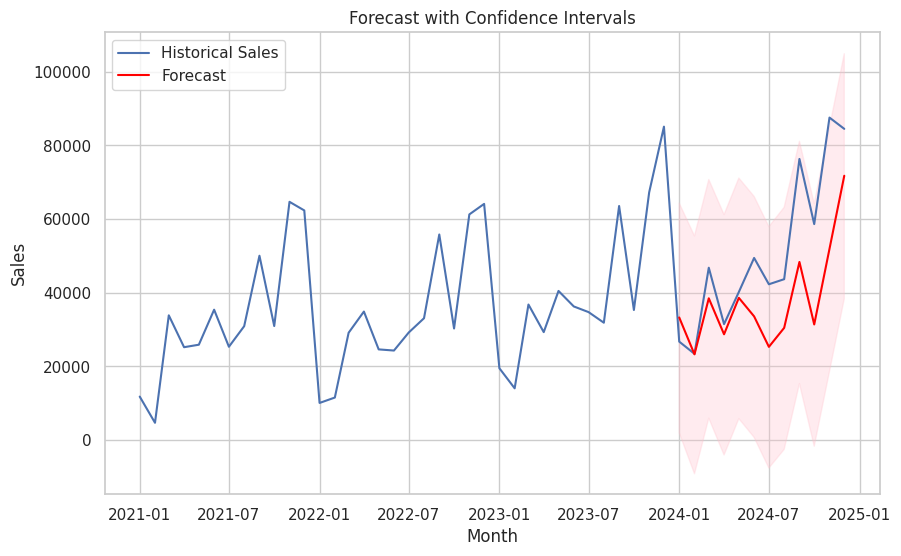

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(mdf.index, mdf['Sales'], label='Historical Sales')
plt.plot(forecast_df.index, forecast_df['Forecast'], label='Forecast', color='red')
plt.fill_between(forecast_index, confidence_intervals.iloc[:, 0], confidence_intervals.iloc[:, 1], color='pink', alpha=0.3)
plt.xlabel('Month')
plt.ylabel('Sales')
plt.title('Forecast with Confidence Intervals')
plt.legend()
plt.show()

In [ ]:
mae = mean_absolute_error(test_mdf['Sales'], forecast_df['Forecast'][:len(test_mdf)])
print(f"Mean Absolute Error (MAE): {mae}")

Mean Absolute Error (MAE): 14082.644851603618


In [ ]:
mse = mean_squared_error(test_mdf['Sales'], forecast_df['Forecast'][:len(test_mdf)])
print(f"Mean Squared Error (MSE): {mse}")

Mean Squared Error (MSE): 316128973.00310856


In [ ]:
rmse = np.sqrt(mse)
print(f"Root Mean Squared Error (RMSE): {rmse}")

Root Mean Squared Error (RMSE): 17780.016113690916


In [ ]:
r2 = r2_score(test_mdf['Sales'], forecast_df['Forecast'])
print(f"R-square (R2): {r2}")

R-square (R2): 0.2639998795556857


**2. SARIMA**

In [ ]:
p, d, q = 1, 1, 1
P, D, Q, S = 1, 1, 1, 12

sarima_model = SARIMAX(train_mdf['Sales'],
                       order=(p, d, q),
                       seasonal_order=(P, D, Q, S))
sarima_results = sarima_model.fit()

/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [ ]:
forecast_index = pd.date_range(start=train_mdf.index[-1] + pd.DateOffset(1), periods=forecast_steps, freq='M')
forecast_mean.index = pd.to_datetime(forecast_mean.index)
forecast_df = forecast_mean.to_frame(name='Forecast')

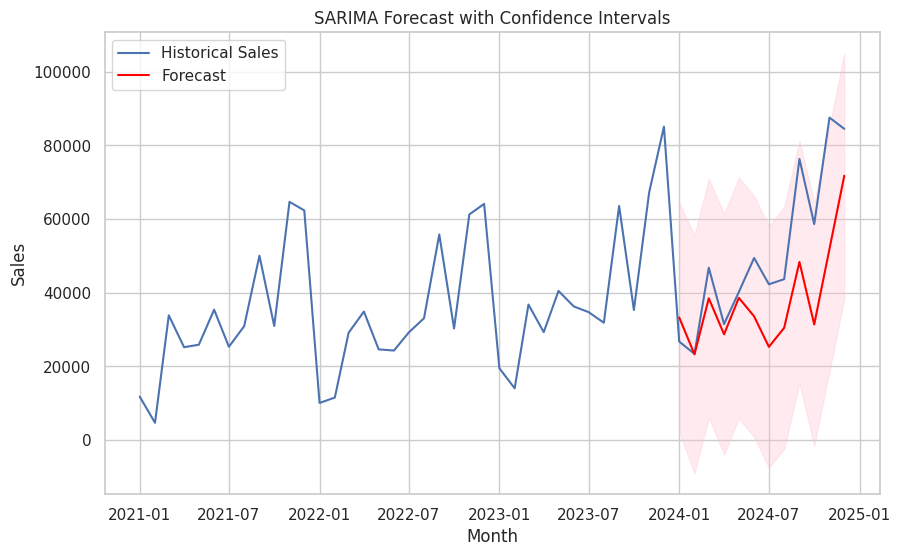

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(mdf.index, mdf['Sales'], label='Historical Sales')
plt.plot(forecast_df.index, forecast_df['Forecast'], label='Forecast', color='red')
plt.fill_between(forecast_df.index, confidence_intervals.iloc[:, 0], confidence_intervals.iloc[:, 1], color='pink', alpha=0.3)
plt.xlabel('Month')
plt.ylabel('Sales')
plt.title('SARIMA Forecast with Confidence Intervals')
plt.legend()
plt.show()

In [ ]:
mae = mean_absolute_error(test_mdf['Sales'], forecast_df['Forecast'])
print(f"Mean Absolute Error (MAE): {mae}")

mse = mean_squared_error(test_mdf['Sales'], forecast_df['Forecast'])
print(f"Mean Squared Error (MSE): {mse}")

rmse = np.sqrt(mse)
print(f"Root Mean Squared Error (RMSE): {rmse}")
r2 = r2_score(test_mdf['Sales'], forecast_df['Forecast'])
print(f"R-square (R2): {r2}")

Mean Absolute Error (MAE): 14082.644851603618
Mean Squared Error (MSE): 316128973.00310856
Root Mean Squared Error (RMSE): 17780.016113690916
R-square (R2): 0.2639998795556857


**3. FB Prophet**

In [ ]:
df_prophet = mdf.reset_index()

In [ ]:
df_prophet = df_prophet[["month", "Sales"]]

In [ ]:
df_prophet.columns = ['ds', 'y']

In [ ]:
train_prophet = df_prophet.iloc[:48 - forecast_steps]
test_prophet = df_prophet.iloc[48 - forecast_steps:forecast_steps + 48]

In [ ]:
model = Prophet()
model.fit(train_prophet)

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpd6utx6jf/jv13_f40.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpd6utx6jf/z1r9fthn.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=81493', 'data', 'file=/tmp/tmpd6utx6jf/jv13_f40.json', 'init=/tmp/tmpd6utx6jf/z1r9fthn.json', 'output', 'file=/tmp/tmpd6utx6jf/prophet_model7b41rpoa/prophet_model-20250203232206.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
23:22:06 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
23:22:06 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [ ]:
future = test_prophet[['ds']]

In [ ]:
forecast = model.predict(future)

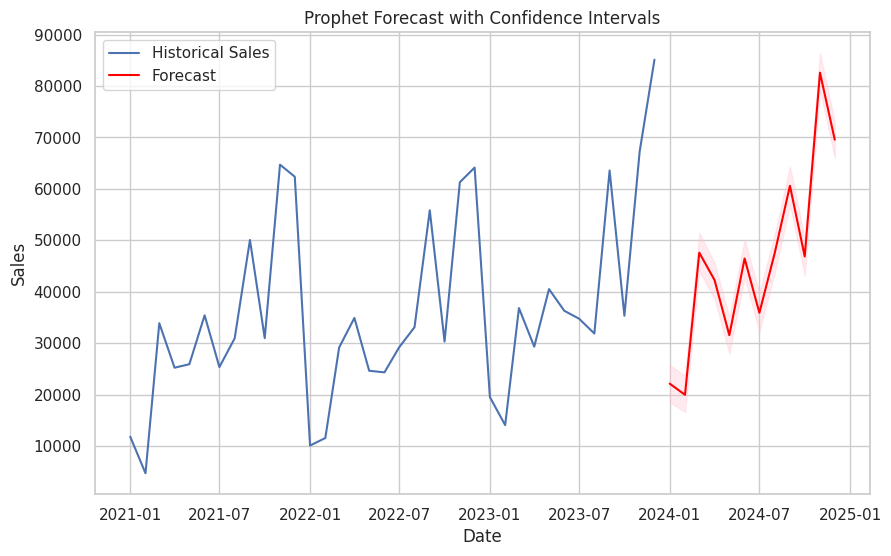

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(train_prophet['ds'], train_prophet['y'], label='Historical Sales')
plt.plot(forecast['ds'], forecast['yhat'], label='Forecast', color='red')
plt.fill_between(forecast['ds'], forecast['yhat_lower'], forecast['yhat_upper'], color='pink', alpha=0.3)
plt.xlabel('Date')
plt.ylabel('Sales')
plt.title('Prophet Forecast with Confidence Intervals')
plt.legend()
plt.show()

In [ ]:
actual = test_prophet['y'].values
forecasted = forecast['yhat'].values

In [ ]:
mae = mean_absolute_error(actual, forecasted)
print(f"Mean Absolute Error (MAE): {mae}")

Mean Absolute Error (MAE): 7415.754388250135


In [ ]:
mse = mean_squared_error(actual, forecasted)
print(f"Mean Squared Error (MSE): {mse}")

Mean Squared Error (MSE): 77096008.46617757


In [ ]:
rmse = np.sqrt(mse)
print(f"Root Mean Squared Error (RMSE): {rmse}")

Root Mean Squared Error (RMSE): 8780.433273260356


In [ ]:
r2 = r2_score(actual, forecasted)
r2

0.8205078421700861

In [ ]:
import pandas as pd

# Assuming 'mdf' contains 'Month' column
# Create a 'Date' column by assuming the year is a fixed value (e.g., 2021)
mdf['Date'] = pd.to_datetime(mdf['Year'].astype(str) + '-' + mdf['Month'].astype(str) + '-01')

# Extract Year and Month
mdf['Year'] = mdf['Date'].dt.year
mdf['Month'] = mdf['Date'].dt.month

# Check the DataFrame
print(mdf.head())

               Sales  time  Rolling_Mean  Rolling_Std  Month  Year       Date
month                                                                        
2021-01-01  11823.07     0           NaN          NaN      1  2021 2021-01-01
2021-02-01   4714.04     1           NaN          NaN      2  2021 2021-02-01
2021-03-01  33885.79     2           NaN          NaN      3  2021 2021-03-01
2021-04-01  25234.52     3           NaN          NaN      4  2021 2021-04-01
2021-05-01  25910.80     4           NaN          NaN      5  2021 2021-05-01


**4. XGBoost**

Baseline Model - MAE: 21290.513052631584, MSE: 773185051.1926897, RMSE: 27806.205264161625
XGBoost Model - MAE: 5352.792796875001, MSE: 51524363.070776716, RMSE: 7178.047302071554, R²: 0.8546710464830627
Improvement over Baseline - MAE Difference: 15937.720255756583
Improvement over Baseline - MSE Difference: 721660688.121913
Improvement over Baseline - RMSE Difference: 20628.15796209007
Improvement over Baseline - R² Difference: -2.0355068233449876


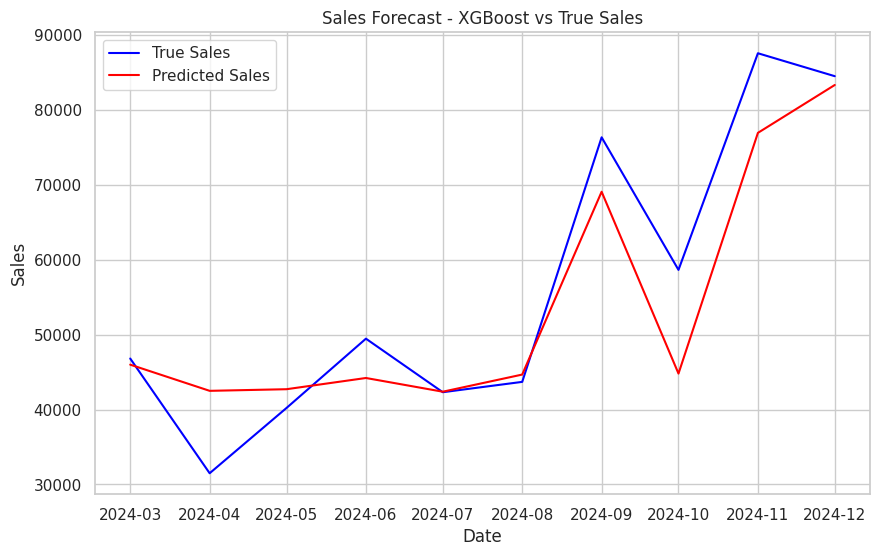

In [ ]:
import numpy as np
import pandas as pd
import xgboost as xgb
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Load and preprocess the data (assuming mdf is the dataset)
# Assuming the dataset 'mdf' has columns: 'Month', 'Sales', 'Rolling_Mean', 'Rolling_Std'

df = mdf.copy()

# Prepare the data for training
X = df[[ 'Month', 'Year']]  # Features
y = df['Sales']  # Target variable

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# Baseline model (Mean model)
baseline_pred = np.mean(y_train)  # Predict the mean of training sales for the test set
baseline_mae = mean_absolute_error(y_test, [baseline_pred] * len(y_test))
baseline_mse = mean_squared_error(y_test, [baseline_pred] * len(y_test))
baseline_rmse = np.sqrt(baseline_mse)
# Calculate baseline R² (as a pseudo R²)
baseline_r2 = 1 - (np.sum((y_test - baseline_pred)**2) / np.sum((y_test - np.mean(y_test))**2))


print(f"Baseline Model - MAE: {baseline_mae}, MSE: {baseline_mse}, RMSE: {baseline_rmse}")

# XGBoost Model
params = {
    'objective': 'reg:squarederror',
    'eval_metric': 'rmse',
    'learning_rate': 0.1,  # Try experimenting with values like 0.01 or 0.3
    'max_depth': 6,  # Experiment with values 4, 6, 8, 10
    'n_estimators': 200,  # Higher value can help (try 100, 200, 500)
    'colsample_bytree': 0.8,  # Can be adjusted for better performance
    'subsample': 0.8,
    'alpha': 0.1
}


# Train the XGBoost model
model = xgb.XGBRegressor(**params)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Model evaluation
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)  # R² score

print(f"XGBoost Model - MAE: {mae}, MSE: {mse}, RMSE: {rmse}, R²: {r2}")

# Compare predictions to baseline
print(f"Improvement over Baseline - MAE Difference: {baseline_mae - mae}")
print(f"Improvement over Baseline - MSE Difference: {baseline_mse - mse}")
print(f"Improvement over Baseline - RMSE Difference: {baseline_rmse - rmse}")
print(f"Improvement over Baseline - R² Difference: {baseline_r2 - r2}")

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(y_test.index, y_test, label='True Sales', color='blue')
plt.plot(y_test.index, y_pred, label='Predicted Sales', color='red')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.title('Sales Forecast - XGBoost vs True Sales')
plt.legend()
plt.show()

In [ ]:
from sklearn.metrics import r2_score

# Assuming y_test is the true values and y_pred is the predicted values for each model
r2 = r2_score(y_test, y_pred)
print(f"R²: {r2}")

R²: 0.8546710464830627


Epoch 1/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 464.7847
Epoch 2/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 427.8324 
Epoch 3/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 437.7032
Epoch 4/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 509.4459
Epoch 5/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 428.0513
Epoch 6/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 445.2411
Epoch 7/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 449.0187
Epoch 8/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 389.9510
Epoch 9/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 368.3128
Epoch 10/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 354.5571
Epoch 11/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 385.7910
Epoch 12/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 324.9490
Epoch 13/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 343.8813
Epoch 14/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 342.4840
Epoch 15/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 309.2919
Epo

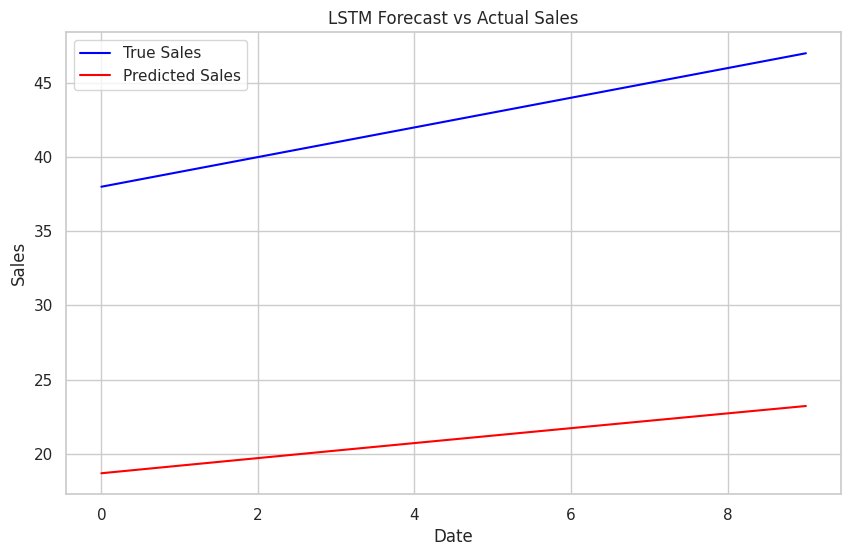

In [ ]:
from keras.models import Sequential
from keras.layers import LSTM, Dense
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np
import matplotlib.pyplot as plt

# Prepare data for LSTM
def prepare_lstm_data(df, time_step=1):
    X, y = [], []
    for i in range(len(df) - time_step):
        X.append(df.iloc[i:i + time_step, 1].values)  # Taking the 'Sales' column
        y.append(df.iloc[i + time_step, 1])  # Target: the next value of 'Sales'
    return np.array(X), np.array(y)

X, y = prepare_lstm_data(mdf)

# Reshape X to be 3D [samples, time_steps, features]
X = X.reshape((X.shape[0], X.shape[1], 1))

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# Define the LSTM model
model = Sequential()
model.add(LSTM(units=50, activation='relu', input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(X_train, y_train, epochs=30, batch_size=16)

# Forecast
forecast_lstm = model.predict(X_test)

# Evaluate the model
mae_lstm = mean_absolute_error(y_test, forecast_lstm)
mse_lstm = mean_squared_error(y_test, forecast_lstm)
rmse_lstm = np.sqrt(mse_lstm)
r2 = r2_score(y_test, y_pred)  # R² score


print(f"LSTM Model - MAE: {mae_lstm}, MSE: {mse_lstm}, RMSE: {rmse_lstm}, RMSE: {rmse}, R²: {r2}")

# Plot results
plt.figure(figsize=(10, 6))
plt.plot(y_test, label='True Sales', color='blue')
plt.plot(forecast_lstm, label='Predicted Sales', color='red')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.title('LSTM Forecast vs Actual Sales')
plt.legend()
plt.show()

In [ ]:
from sklearn.metrics import r2_score

# Assuming y_test is the true values and y_pred is the predicted values for each model
r2 = r2_score(y_test, y_pred)
print(f"R²: {r2}")

R²: -376893504.0


In [ ]:
mdf

,Sales,time,Rolling_Mean,Rolling_Std,Month,Year,Date
month,,,,,,,
2021-01-01,11823.07,0,NaN,NaN,1,2021,2021-01-01
2021-02-01,4714.04,1,NaN,NaN,2,2021,2021-02-01
2021-03-01,33885.79,2,NaN,NaN,3,2021,2021-03-01
2021-04-01,25234.52,3,NaN,NaN,4,2021,2021-04-01
2021-05-01,25910.80,4,NaN,NaN,5,2021,2021-05-01
2021-06-01,35416.65,5,NaN,NaN,6,2021,2021-06-01
2021-07-01,25354.53,6,NaN,NaN,7,2021,2021-07-01
2021-08-01,30938.05,7,NaN,NaN,8,2021,2021-08-01
2021-09-01,50068.05,8,NaN,NaN,9,2021,2021-09-01


[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Info] Total Bins 0
[LightGBM] [Info] Number of data points in the train set: 38, number of used features: 0
[LightGBM] [Info] Start training from score 35648.703690
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the 

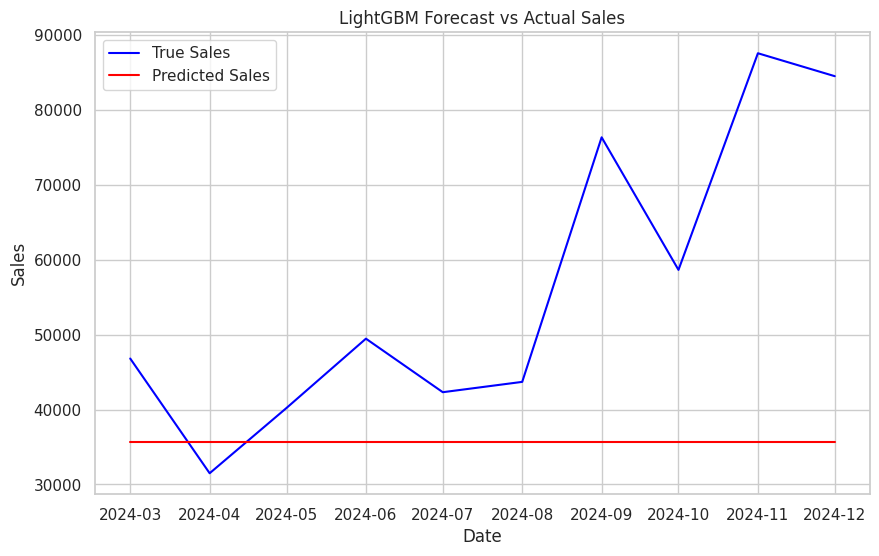

[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Info] Total Bins 0
[LightGBM] [Info] Number of data points in the train set: 38, number of used features: 0
[LightGBM] [Info] Start training from score 35648.703690
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the 

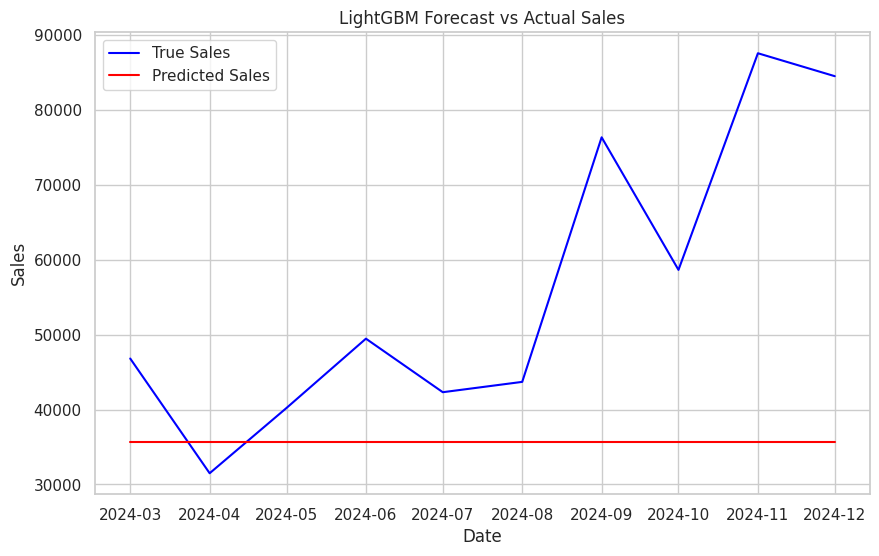

In [ ]:
import lightgbm as lgb
from sklearn.metrics import mean_absolute_error, mean_squared_error
import matplotlib.pyplot as plt

# Prepare data for LightGBM
X = mdf[[ 'Month', 'Year']]
y = mdf['Sales']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# Define LightGBM model
model_lgb = lgb.LGBMRegressor(n_estimators=100, learning_rate=0.05)
model_lgb.fit(X_train, y_train)

# Make predictions
forecast_lgb = model_lgb.predict(X_test)

# Evaluate the model
mae_lgb = mean_absolute_error(y_test, forecast_lgb)
mse_lgb = mean_squared_error(y_test, forecast_lgb)
rmse_lgb = np.sqrt(mse_lgb)
r2 = r2_score(y_test, y_pred)  # R² score

print(f"LightGBM Model - MAE: {mae}, MSE: {mse}, RMSE: {rmse}, R²: {r2}")



# Plot results
plt.figure(figsize=(10, 6))
plt.plot(y_test.index, y_test, label='True Sales', color='blue')
plt.plot(y_test.index, forecast_lgb, label='Predicted Sales', color='red')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.title('LightGBM Forecast vs Actual Sales')
plt.legend()
plt.show()
import lightgbm as lgb
from sklearn.metrics import mean_absolute_error, mean_squared_error
import matplotlib.pyplot as plt

# Prepare data for LightGBM
X = mdf[[ 'Month', 'Year']]
y = mdf['Sales']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# Define LightGBM model
model_lgb = lgb.LGBMRegressor(n_estimators=100, learning_rate=0.05)
model_lgb.fit(X_train, y_train)

# Make predictions
forecast_lgb = model_lgb.predict(X_test)

# Evaluate the model
mae_lgb = mean_absolute_error(y_test, forecast_lgb)
mse_lgb = mean_squared_error(y_test, forecast_lgb)
rmse_lgb = np.sqrt(mse_lgb)

print(f"LightGBM Model - MAE: {mae_lgb}, MSE: {mse_lgb}, RMSE: {rmse_lgb}")

# Plot results
plt.figure(figsize=(10, 6))
plt.plot(y_test.index, y_test, label='True Sales', color='blue')
plt.plot(y_test.index, forecast_lgb, label='Predicted Sales', color='red')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.title('LightGBM Forecast vs Actual Sales')
plt.legend()
plt.show()

In [ ]:
from sklearn.metrics import r2_score

# Assuming y_test is the true values and y_pred is the predicted values for each model
r2 = r2_score(y_test, y_pred)
print(f"R²: {r2}")

R²: 0.8546710464830627


ARIMA + Random Forest Model - MAE: 11866.766170000024, MSE: 193656050.01492456, RMSE: 13916.03571477612, R²: 0.45377624460427113
Improvement over Baseline - MAE Difference: 9423.74688263156
Improvement over Baseline - MSE Difference: 579529001.1777651
Improvement over Baseline - RMSE Difference: 13890.169549385504
Improvement over Baseline - R² Difference: -1.634612021466196


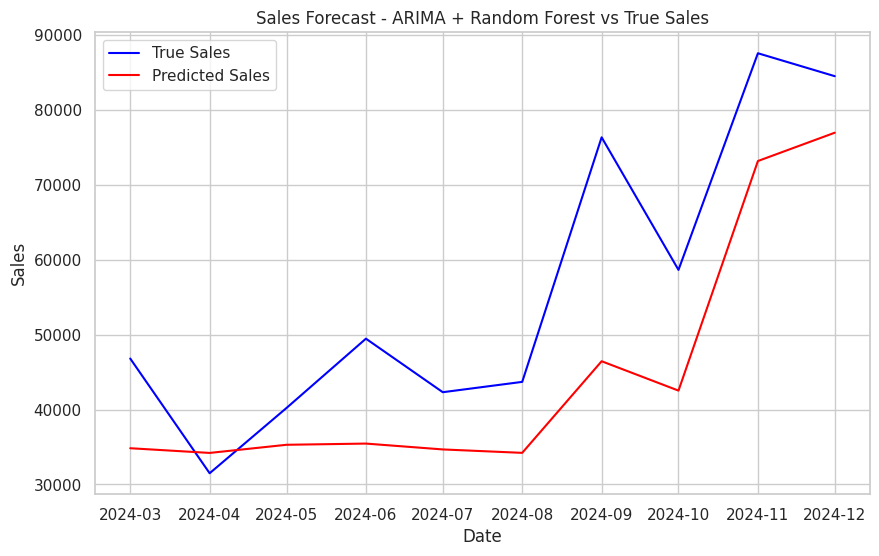

In [ ]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA

# Load and preprocess the data (assuming mdf is the dataset)
df = mdf.copy()

# Prepare the data for ARIMA + Random Forest Model
# Use 'Sales' as target variable, and 'Month', 'Year' as potential features
# Create a new dataframe with ARIMA predictions and features for Random Forest
df_arima = df[['Month', 'Year', 'Sales']].copy()

# Fit ARIMA model for trend forecasting
arima_model = ARIMA(df_arima['Sales'], order=(1, 1, 1))  # ARIMA model (p, d, q)
arima_model_fit = arima_model.fit()

# Get the ARIMA predicted values
arima_pred = arima_model_fit.predict(start=0, end=len(df_arima)-1, dynamic=False)

# Add ARIMA predictions to the dataframe as a feature
df_arima['arima_pred'] = arima_pred

# Prepare data for Random Forest model
X = df_arima[['Month', 'Year', 'arima_pred']]  # Features (ARIMA predictions as a feature)
y = df_arima['Sales']  # Target variable

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# Train the Random Forest model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions
y_pred = rf_model.predict(X_test)

# Model evaluation
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

# Print results
print(f"ARIMA + Random Forest Model - MAE: {mae}, MSE: {mse}, RMSE: {rmse}, R²: {r2}")

# Compare predictions to baseline (if needed)
baseline_pred = np.mean(y_train)  # Predict the mean of training sales for the test set
baseline_mae = mean_absolute_error(y_test, [baseline_pred] * len(y_test))
baseline_mse = mean_squared_error(y_test, [baseline_pred] * len(y_test))
baseline_rmse = np.sqrt(baseline_mse)
baseline_r2 = r2_score(y_test, [baseline_pred] * len(y_test))

print(f"Improvement over Baseline - MAE Difference: {baseline_mae - mae}")
print(f"Improvement over Baseline - MSE Difference: {baseline_mse - mse}")
print(f"Improvement over Baseline - RMSE Difference: {baseline_rmse - rmse}")
print(f"Improvement over Baseline - R² Difference: {baseline_r2 - r2}")

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(y_test.index, y_test, label='True Sales', color='blue')
plt.plot(y_test.index, y_pred, label='Predicted Sales', color='red')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.title('Sales Forecast - ARIMA + Random Forest vs True Sales')
plt.legend()
plt.show()

Bayesian Ridge + DNN Model - MAE: 28026.072196719953, MSE: 947029789.0404856, RMSE: 30773.849109925875, R²: -1.6711800008388722


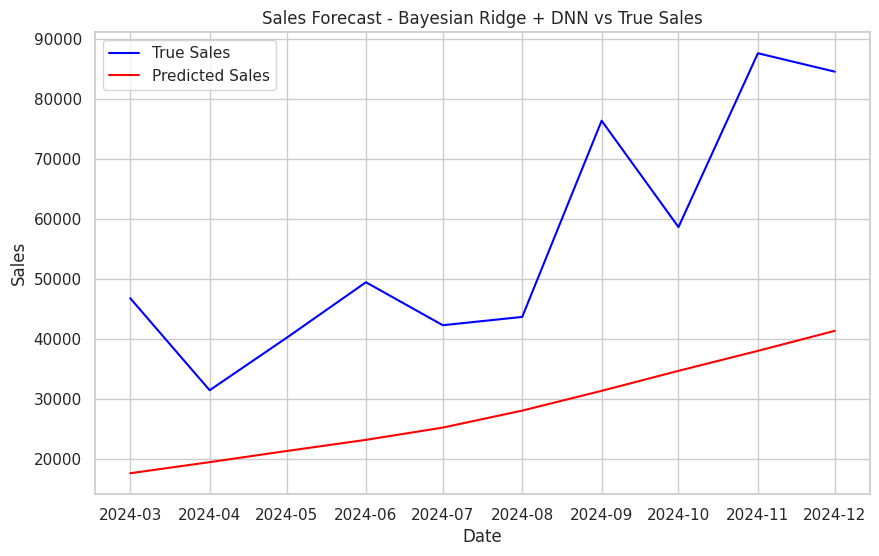

In [ ]:
from sklearn.linear_model import BayesianRidge
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# Assuming mdf is your dataframe
X = mdf[['Month', 'Year']]  # Features
y = mdf['Sales']  # Target Variable

# Scale the features for DNN
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, shuffle=False)

# Bayesian Ridge Regression
bayesian_model = BayesianRidge()
bayesian_model.fit(X_train, y_train)

# Predict with Bayesian Ridge
y_train_bayesian_pred = bayesian_model.predict(X_train)
y_test_bayesian_pred = bayesian_model.predict(X_test)

# Deep Neural Network Model
dnn_model = MLPRegressor(hidden_layer_sizes=(100, 50), max_iter=1000)
dnn_model.fit(X_train, y_train)

# Predict with DNN
y_train_dnn_pred = dnn_model.predict(X_train)
y_test_dnn_pred = dnn_model.predict(X_test)

# Combine predictions from Bayesian Ridge and DNN
y_test_combined_pred = (y_test_bayesian_pred + y_test_dnn_pred) / 2

# Evaluation
mae = mean_absolute_error(y_test, y_test_combined_pred)
mse = mean_squared_error(y_test, y_test_combined_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_test_combined_pred)  # R² calculation

print(f"Bayesian Ridge + DNN Model - MAE: {mae}, MSE: {mse}, RMSE: {rmse}, R²: {r2}")

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(y_test.index, y_test, label='True Sales', color='blue')
plt.plot(y_test.index, y_test_combined_pred, label='Predicted Sales', color='red')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.title('Sales Forecast - Bayesian Ridge + DNN vs True Sales')
plt.legend()
plt.show()

/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA + XGBoost Model - MAE: 12928.042506608519, MSE: 210698669.7213006, RMSE: 14515.463124588916, R²: 0.40570605140823857


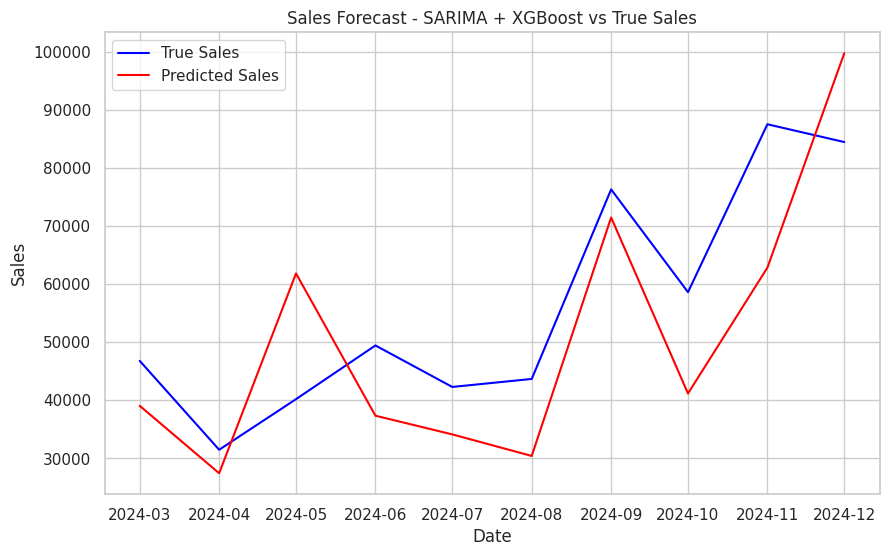

In [ ]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
import xgboost as xgb
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np
from sklearn.model_selection import train_test_split

# Data Preprocessing
X = mdf[['Month', 'Year']]  # Features
y = mdf['Sales']  # Target Variable

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# SARIMA Model
sarima_model = SARIMAX(y_train, order=(1, 1, 1), seasonal_order=(1, 1, 1, 12))  # Adjust SARIMA parameters for best fit
sarima_model_fit = sarima_model.fit()

# Forecast using SARIMA
y_train_sarima_pred = sarima_model_fit.predict(start=0, end=len(y_train)-1)
y_test_sarima_pred = sarima_model_fit.predict(start=len(y_train), end=len(y_train) + len(y_test) - 1)

# Train XGBoost Model on Residuals (for non-seasonal influences)
rf_model = xgb.XGBRegressor(objective='reg:squarederror')
rf_model.fit(X_train, y_train - y_train_sarima_pred)

# Predict using XGBoost
y_test_rf_pred = rf_model.predict(X_test)

# Combine SARIMA and XGBoost predictions
y_test_combined_pred = y_test_sarima_pred + y_test_rf_pred

# Evaluation
mae = mean_absolute_error(y_test, y_test_combined_pred)
mse = mean_squared_error(y_test, y_test_combined_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_test_combined_pred)  # R² calculation

print(f"SARIMA + XGBoost Model - MAE: {mae}, MSE: {mse}, RMSE: {rmse}, R²: {r2}")

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(y_test.index, y_test, label='True Sales', color='blue')
plt.plot(y_test.index, y_test_combined_pred, label='Predicted Sales', color='red')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.title('Sales Forecast - SARIMA + XGBoost vs True Sales')
plt.legend()
plt.show()

ARIMA + XGBoost Model - MAE: 8816.016425752381, MSE: 136427058.91217202, RMSE: 11680.199438030671, R²: 0.6151955983257023


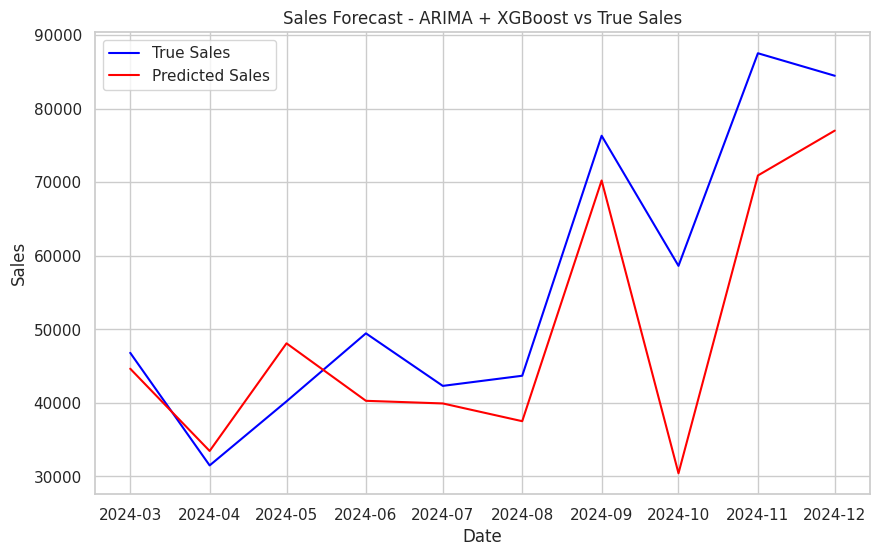

In [ ]:
from statsmodels.tsa.arima.model import ARIMA  # Use ARIMA instead of SARIMAX
import xgboost as xgb
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np
from sklearn.model_selection import train_test_split

# Data Preprocessing
X = mdf[['Month', 'Year']]  # Features
y = mdf['Sales']  # Target Variable

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# ARIMA Model
arima_model = ARIMA(y_train, order=(1, 1, 1))  # ARIMA(p, d, q) - Adjust parameters for best fit
arima_model_fit = arima_model.fit()

# Forecast using ARIMA
y_train_arima_pred = arima_model_fit.predict(start=0, end=len(y_train)-1, typ='levels')
y_test_arima_pred = arima_model_fit.predict(start=len(y_train), end=len(y_train) + len(y_test) - 1, typ='levels')

# Train XGBoost Model on Residuals (for non-seasonal influences)
xgb_model = xgb.XGBRegressor(objective='reg:squarederror')
xgb_model.fit(X_train, y_train - y_train_arima_pred)

# Predict using XGBoost
y_test_xgb_pred = xgb_model.predict(X_test)

# Combine ARIMA and XGBoost predictions
y_test_combined_pred = y_test_arima_pred + y_test_xgb_pred

# Evaluation
mae = mean_absolute_error(y_test, y_test_combined_pred)
mse = mean_squared_error(y_test, y_test_combined_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_test_combined_pred)  # R² calculation

print(f"ARIMA + XGBoost Model - MAE: {mae}, MSE: {mse}, RMSE: {rmse}, R²: {r2}")

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(y_test.index, y_test, label='True Sales', color='blue')
plt.plot(y_test.index, y_test_combined_pred, label='Predicted Sales', color='red')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.title('Sales Forecast - ARIMA + XGBoost vs True Sales')
plt.legend()
plt.show()

[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Info] Total Bins 0
[LightGBM] [Info] Number of data points in the train set: 38, number of used features: 0
[LightGBM] [Info] Start training from score 5108.257181
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the s

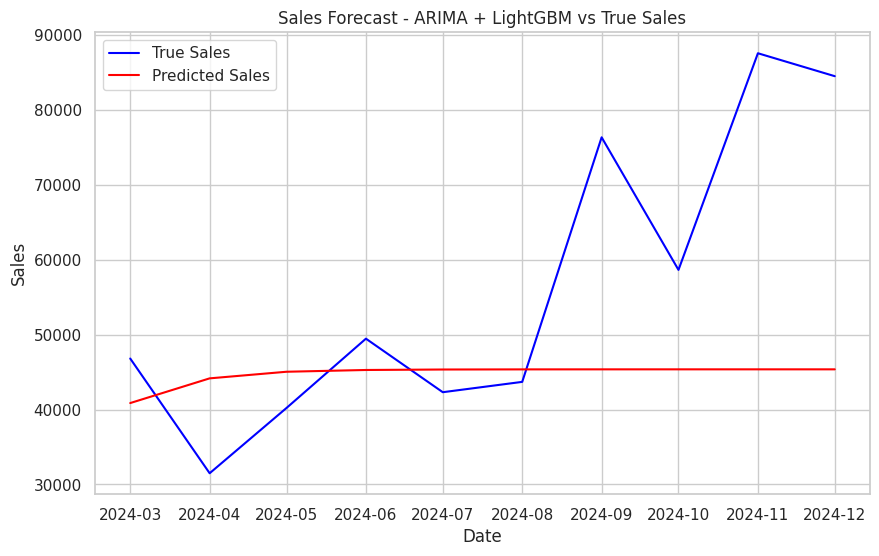

In [ ]:
from statsmodels.tsa.arima.model import ARIMA  # Use ARIMA instead of SARIMAX
import lightgbm as lgb  # Import LightGBM
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np
from sklearn.model_selection import train_test_split

# Data Preprocessing
X = mdf[['Month', 'Year']]  # Features
y = mdf['Sales']  # Target Variable

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# ARIMA Model
arima_model = ARIMA(y_train, order=(1, 1, 1))  # ARIMA(p, d, q) - Adjust parameters for best fit
arima_model_fit = arima_model.fit()

# Forecast using ARIMA
y_train_arima_pred = arima_model_fit.predict(start=0, end=len(y_train)-1, typ='levels')
y_test_arima_pred = arima_model_fit.predict(start=len(y_train), end=len(y_train) + len(y_test) - 1, typ='levels')

# Train LightGBM Model on Residuals (for non-seasonal influences)
lgb_model = lgb.LGBMRegressor(objective='regression')  # LightGBM model
lgb_model.fit(X_train, y_train - y_train_arima_pred)

# Predict using LightGBM
y_test_lgb_pred = lgb_model.predict(X_test)

# Combine ARIMA and LightGBM predictions
y_test_combined_pred = y_test_arima_pred + y_test_lgb_pred

# Evaluation
mae = mean_absolute_error(y_test, y_test_combined_pred)
mse = mean_squared_error(y_test, y_test_combined_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_test_combined_pred)  # R² calculation

print(f"ARIMA + LightGBM Model - MAE: {mae}, MSE: {mse}, RMSE: {rmse}, R²: {r2}")

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(y_test.index, y_test, label='True Sales', color='blue')
plt.plot(y_test.index, y_test_combined_pred, label='Predicted Sales', color='red')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.title('Sales Forecast - ARIMA + LightGBM vs True Sales')
plt.legend()
plt.show()

ARIMA + AdaBoost Model - MAE: 9405.340952115326, MSE: 146628055.2631002, RMSE: 12109.007195600316, R²: 0.5864227996697722


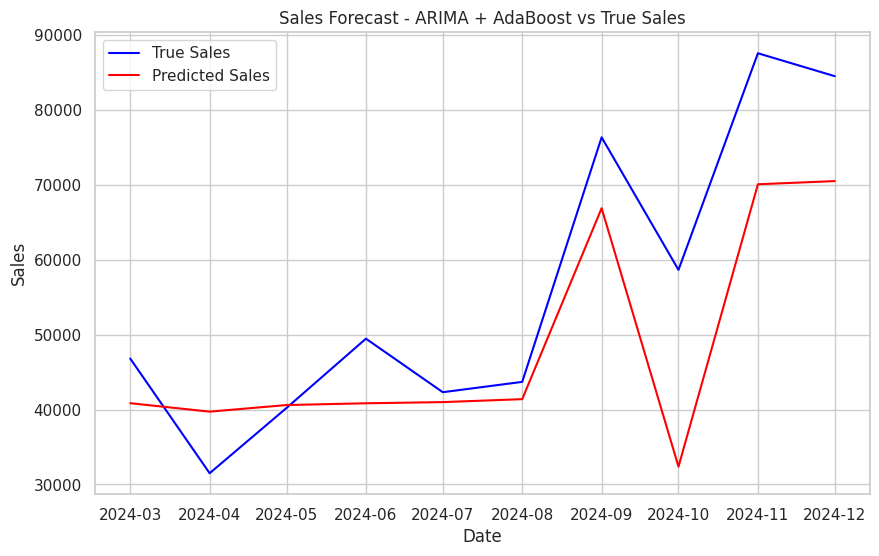

In [ ]:
from statsmodels.tsa.arima.model import ARIMA
from sklearn.ensemble import AdaBoostRegressor  # Import AdaBoost
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor  # Base model for AdaBoost

# Data Preprocessing
X = mdf[['Month', 'Year']]  # Features
y = mdf['Sales']  # Target Variable

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# ARIMA Model
arima_model = ARIMA(y_train, order=(1, 1, 1))  # Adjust (p, d, q) parameters for best fit
arima_model_fit = arima_model.fit()

# Forecast using ARIMA
y_train_arima_pred = arima_model_fit.predict(start=0, end=len(y_train)-1, typ='levels')
y_test_arima_pred = arima_model_fit.predict(start=len(y_train), end=len(y_train) + len(y_test) - 1, typ='levels')

# Train AdaBoost Model on Residuals
ada_model = AdaBoostRegressor(estimator=DecisionTreeRegressor(max_depth=3), n_estimators=50, random_state=42)
ada_model.fit(X_train, y_train - y_train_arima_pred)  # Learn residuals


# Predict using AdaBoost
y_test_ada_pred = ada_model.predict(X_test)

# Combine ARIMA and AdaBoost predictions
y_test_combined_pred = y_test_arima_pred + y_test_ada_pred

# Evaluation
mae = mean_absolute_error(y_test, y_test_combined_pred)
mse = mean_squared_error(y_test, y_test_combined_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_test_combined_pred)  # R² calculation

print(f"ARIMA + AdaBoost Model - MAE: {mae}, MSE: {mse}, RMSE: {rmse}, R²: {r2}")

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(y_test.index, y_test, label='True Sales', color='blue')
plt.plot(y_test.index, y_test_combined_pred, label='Predicted Sales', color='red')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.title('Sales Forecast - ARIMA + AdaBoost vs True Sales')
plt.legend()
plt.show()

/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA + AdaBoost Model - MAE: 8836.685214187333, MSE: 115410847.45609312, RMSE: 10742.944077676897, R²: 0.6744736531287691


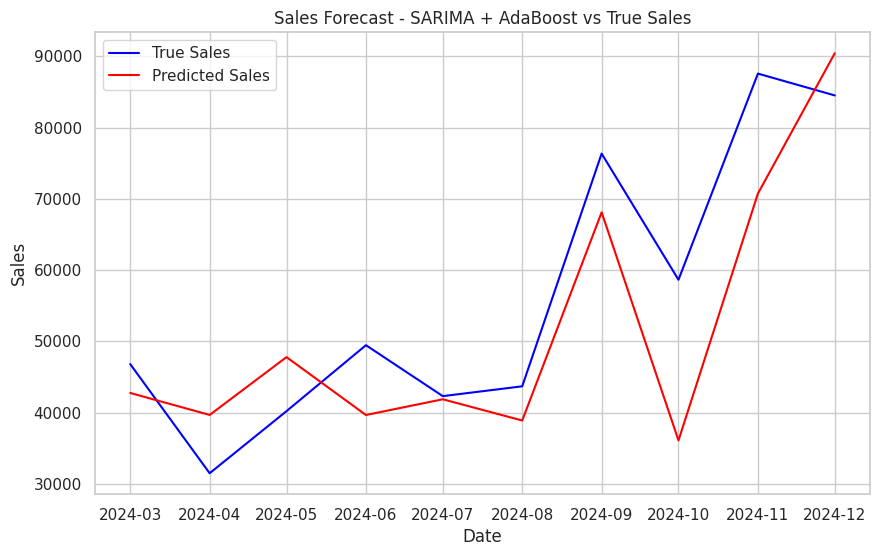

In [ ]:
from statsmodels.tsa.statespace.sarimax import SARIMAX  # Import SARIMA
from sklearn.ensemble import AdaBoostRegressor
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor  # Base model for AdaBoost

# Data Preprocessing
X = mdf[['Month', 'Year']]  # Features
y = mdf['Sales']  # Target Variable

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# SARIMA Model (Seasonal ARIMA)
sarima_model = SARIMAX(y_train, order=(1, 1, 1), seasonal_order=(1, 1, 1, 12))  # Adjust parameters based on seasonality
sarima_model_fit = sarima_model.fit()

# Forecast using SARIMA
y_train_sarima_pred = sarima_model_fit.predict(start=0, end=len(y_train)-1, typ='levels')
y_test_sarima_pred = sarima_model_fit.predict(start=len(y_train), end=len(y_train) + len(y_test) - 1, typ='levels')

# Train AdaBoost Model on Residuals
ada_model = AdaBoostRegressor(estimator=DecisionTreeRegressor(max_depth=3), n_estimators=50, random_state=42)
ada_model.fit(X_train, y_train - y_train_sarima_pred)  # Learn residuals

# Predict using AdaBoost
y_test_ada_pred = ada_model.predict(X_test)

# Combine SARIMA and AdaBoost predictions
y_test_combined_pred = y_test_sarima_pred + y_test_ada_pred

# Evaluation
mae = mean_absolute_error(y_test, y_test_combined_pred)
mse = mean_squared_error(y_test, y_test_combined_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_test_combined_pred)

print(f"SARIMA + AdaBoost Model - MAE: {mae}, MSE: {mse}, RMSE: {rmse}, R²: {r2}")

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(y_test.index, y_test, label='True Sales', color='blue')
plt.plot(y_test.index, y_test_combined_pred, label='Predicted Sales', color='red')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.title('Sales Forecast - SARIMA + AdaBoost vs True Sales')
plt.legend()
plt.show()

/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA + Random Forest Model - MAE: 9854.964066462195, MSE: 128406351.94544601, RMSE: 11331.65265728905, R²: 0.6378187008828189


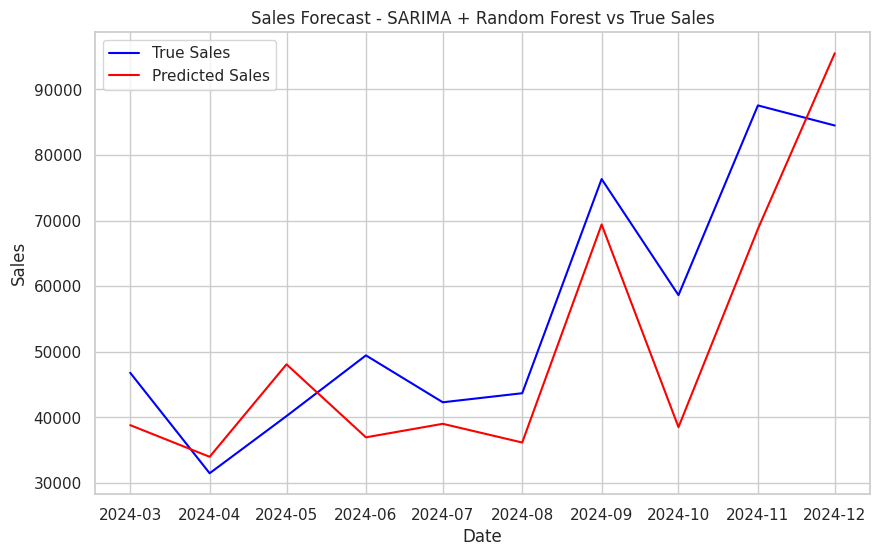

In [ ]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np
from sklearn.model_selection import train_test_split

# Data Preprocessing
X = mdf[['Month', 'Year']]
y = mdf['Sales']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# SARIMA Model
sarima_model = SARIMAX(y_train, order=(1, 1, 1), seasonal_order=(1, 1, 1, 12))
sarima_model_fit = sarima_model.fit()

# Forecast using SARIMA
y_train_sarima_pred = sarima_model_fit.predict(start=0, end=len(y_train)-1, typ='levels')
y_test_sarima_pred = sarima_model_fit.predict(start=len(y_train), end=len(y_train) + len(y_test) - 1, typ='levels')

# Train Random Forest on Residuals
rf_model = RandomForestRegressor(n_estimators=100, max_depth=5, random_state=42)
rf_model.fit(X_train, y_train - y_train_sarima_pred)

# Predict using Random Forest
y_test_rf_pred = rf_model.predict(X_test)

# Combine SARIMA and Random Forest predictions
y_test_combined_pred = y_test_sarima_pred + y_test_rf_pred

# Evaluation Metrics
mae_rf = mean_absolute_error(y_test, y_test_combined_pred)
mse_rf = mean_squared_error(y_test, y_test_combined_pred)
rmse_rf = np.sqrt(mse_rf)
r2_rf = r2_score(y_test, y_test_combined_pred)

# Print Results
print(f"SARIMA + Random Forest Model - MAE: {mae_rf}, MSE: {mse_rf}, RMSE: {rmse_rf}, R²: {r2_rf}")

# Plot Results
plt.figure(figsize=(10, 6))
plt.plot(y_test.index, y_test, label='True Sales', color='blue')
plt.plot(y_test.index, y_test_combined_pred, label='Predicted Sales', color='red')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.title('Sales Forecast - SARIMA + Random Forest vs True Sales')
plt.legend()
plt.show()

[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Info] Total Bins 0
[LightGBM] [Info] Number of data points in the train set: 38, number of used features: 0
[LightGBM] [Info] Start training from score 280.038826
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the sp

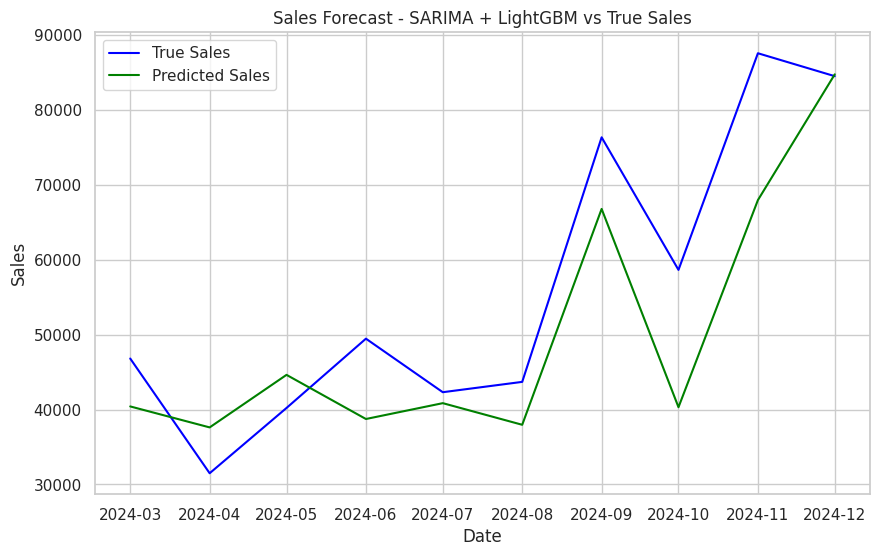

In [ ]:
import lightgbm as lgb

# Train LightGBM on Residuals
lgb_model = lgb.LGBMRegressor(objective='regression', n_estimators=100, learning_rate=0.05)
lgb_model.fit(X_train, y_train - y_train_sarima_pred)

# Predict using LightGBM
y_test_lgb_pred = lgb_model.predict(X_test)

# Combine SARIMA and LightGBM predictions
y_test_combined_pred_lgb = y_test_sarima_pred + y_test_lgb_pred

# Evaluation Metrics
mae_lgb = mean_absolute_error(y_test, y_test_combined_pred_lgb)
mse_lgb = mean_squared_error(y_test, y_test_combined_pred_lgb)
rmse_lgb = np.sqrt(mse_lgb)
r2_lgb = r2_score(y_test, y_test_combined_pred_lgb)

# Print Results
print(f"SARIMA + LightGBM Model - MAE: {mae_lgb}, MSE: {mse_lgb}, RMSE: {rmse_lgb}, R²: {r2_lgb}")

# Plot Results
plt.figure(figsize=(10, 6))
plt.plot(y_test.index, y_test, label='True Sales', color='blue')
plt.plot(y_test.index, y_test_combined_pred_lgb, label='Predicted Sales', color='green')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.title('Sales Forecast - SARIMA + LightGBM vs True Sales')
plt.legend()
plt.show()